# Montar carpeta de imágenes en GoogleDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#ir a la carpeta de datos
%cd /content/drive/MyDrive/rodiucan/datosimg

# Montar carpeta de imágenes en disco local

In [1]:
#ir a la carpeta de datos
%cd d:/rodiucan/datosimg

d:\rodiucan\datosimg


# Importar librerias

In [ ]:
#pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import timeit
import skimage

# Funciones

In [ ]:
#-----------------------FUNCION PARA OBTENER EL NOMBRE DE ARCHIVO SEGUN SU NUMERO
#Esta funcion debe cambiarse en caso de usar otro dataset de imagenes
def getNombreArchivo(num):
    #rellenar con ceros a la izquierda
    cad=str(num).rjust(3,'0')
    return 'im_'+cad
#-----------------------------------------------------------------------------------------------------------

#----------Funciones para escalar el dataset DIV2K_train_HR a un tercio de su tamaño
def getNombreArchivo1000(num):
    #rellenar con ceros a la izquierda
    cad=str(num).rjust(4,'0')
    return cad
def escalar_imagenes(xposini,xposfin,xcarpeta_img_original,xcarpeta_img,reduccion):
    for i in range(xposini,xposfin):
        img = cv2.imread(xcarpeta_img_original+'/'+getNombreArchivo1000(i)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
        img2 = cv2.resize(img, dsize=(int(img.shape[1]/reduccion),int(img.shape[0]/reduccion)), interpolation=cv2.INTER_CUBIC)    
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+'.png',img2)
#---------------------------

#---------------------------FUNCION DE AUMENTO DE DATOS, reflejo horizontal y vertical
def aumentar_datos(xposini,xposfin,xcarpeta_img_original,xcarpeta_img):
    xini=xposfin
    for i in range(xposini,xposfin):
        img = cv2.imread(xcarpeta_img_original+'/'+getNombreArchivo(i)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+'.png',img)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(xini)+'.png',cv2.flip(img,0))
        xini=xini+1
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(xini)+'.png',cv2.flip(img,1))
        xini=xini+1

#---------------------------FUNCION INICIAL DE PROCESAMIENTO DE IMAGENES
#Procesa las imagenes originales, convirtiendolas a color y en grises escaladas un multiplo de 128, 
#y construyendo las imagenes reducidas un factor de 2x, 4x y 6x. Y tambien aplicando filtro desenfoque.
#def procesar_imagenes(xposini,xposfin,xcarpeta_img_original,xcarpeta_img,xnom_img1,xnom_img1color,xnom_img2,xnom_img2color,xnom_img3,xnom_img3color,xnom_img4,xnom_img4color,xnom_img5,xnom_img5color,xnom_img7,xnom_img7color,xnom_img8,xnom_img8color,xnom_img9,xnom_img9color,xnom_img6,xnom_img6color):
def procesar_imagenes(xposini,xposfin,xcarpeta_img_original,xcarpeta_img,xnom_img1,xnom_img1color,xnom_img2,xnom_img2color,xnom_img3,xnom_img3color,xnom_img4,xnom_img4color,xnom_img5,xnom_img5color,xnom_img7,xnom_img7color,xnom_img8,xnom_img8color,xnom_img9,xnom_img9color):
    for i in range(xposini,xposfin):
        img = cv2.imread(xcarpeta_img_original+'/'+getNombreArchivo(i)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #Redimensionar a multiplo 64x64
        tamsegy=int(img.shape[0]/128)+1
        tamsegx=int(img.shape[1]/128)+1
        nuevoy=tamsegy*128
        nuevox=tamsegx*128
        img2 = cv2.resize(img, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)    
        #Convertir a grises y guardar
        r,g,b=img2[:,:,0],img2[:,:,1],img2[:,:,2]
        egrises=0.2989*r+0.5870*g+0.1140*b
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img1+'.png',egrises,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img1color+'.png',img2)
        
        #----------Reducir a la mitad 2x y reescalada a 2x
        img3 = cv2.resize(egrises, dsize=(int(nuevox/2),int(nuevoy/2)), interpolation=cv2.INTER_CUBIC)
        img4 = cv2.resize(img3, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img3nearest = cv2.resize(egrises, dsize=(int(nuevox/2),int(nuevoy/2)), interpolation=cv2.INTER_NEAREST)
        img4nearest = cv2.resize(img3nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2+'r2.png',img3,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2+'.png',img4,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2+'nearest.png',img4nearest,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2+'nearestblur.png',cv2.blur(img4nearest,(5,5)),cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img7+'.png',cv2.blur(img4,(5,5)),cmap='gray')
        img3 = cv2.resize(img2, dsize=(int(nuevox/2),int(nuevoy/2)), interpolation=cv2.INTER_CUBIC)
        img4 = cv2.resize(img3, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img3nearest = cv2.resize(img2, dsize=(int(nuevox/2),int(nuevoy/2)), interpolation=cv2.INTER_NEAREST)
        img4nearest = cv2.resize(img3nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2color+'r2.png',img3)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2color+'.png',img4)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2color+'nearest.png',img4nearest)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img2color+'nearestblur.png',cv2.blur(img4nearest,(5,5)))
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img7color+'.png',cv2.blur(img4,(5,5)))
        
        
        #----------Reducir a la cuarta 4x y reescalada a 4x
        img5 = cv2.resize(egrises, dsize=(int(nuevox/4),int(nuevoy/4)), interpolation=cv2.INTER_CUBIC)
        img6 = cv2.resize(img5, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img5nearest = cv2.resize(egrises, dsize=(int(nuevox/4),int(nuevoy/4)), interpolation=cv2.INTER_NEAREST)
        img6nearest = cv2.resize(img5nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3+'r4.png',img5,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3+'.png',img6,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3+'nearest.png',img6nearest,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3+'nearestblur.png',cv2.blur(img6nearest,(5,5)),cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img8+'.png',cv2.blur(img6,(5,5)),cmap='gray')
        img5 = cv2.resize(img2, dsize=(int(nuevox/4),int(nuevoy/4)), interpolation=cv2.INTER_CUBIC)
        img6 = cv2.resize(img5, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img5nearest = cv2.resize(img2, dsize=(int(nuevox/4),int(nuevoy/4)), interpolation=cv2.INTER_NEAREST)
        img6nearest = cv2.resize(img5nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3color+'r4.png',img5)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3color+'.png',img6)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3color+'nearest.png',img6nearest)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img3color+'nearestblur.png',cv2.blur(img6nearest,(5,5)))
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img8color+'.png',cv2.blur(img6,(5,5)))
        
        #----------Reducir a la sexta 6x y reescalada a 6x
        img7 = cv2.resize(egrises, dsize=(int(nuevox/6),int(nuevoy/6)), interpolation=cv2.INTER_CUBIC)
        img8 = cv2.resize(img7, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img7nearest = cv2.resize(egrises, dsize=(int(nuevox/6),int(nuevoy/6)), interpolation=cv2.INTER_NEAREST)
        img8nearest = cv2.resize(img7nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4+'r6.png',img7,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4+'.png',img8,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4+'nearest.png',img8nearest,cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4+'nearestblur.png',cv2.blur(img8nearest,(5,5)),cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img9+'.png',cv2.blur(img8,(5,5)),cmap='gray')
        img7 = cv2.resize(img2, dsize=(int(nuevox/6),int(nuevoy/6)), interpolation=cv2.INTER_CUBIC)
        img8 = cv2.resize(img7, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_CUBIC)
        img7nearest = cv2.resize(img2, dsize=(int(nuevox/6),int(nuevoy/6)), interpolation=cv2.INTER_NEAREST)
        img8nearest = cv2.resize(img7nearest, dsize=(nuevox,nuevoy), interpolation=cv2.INTER_NEAREST)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4color+'r6.png',img7)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4color+'.png',img8)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4color+'nearest.png',img8nearest)
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img4color+'nearestblur.png',cv2.blur(img8nearest,(5,5)))
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img9color+'.png',cv2.blur(img8,(5,5)))
        
        #----------Desenfoque-----------
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img5+'.png',cv2.blur(egrises,(5,5)),cmap='gray')
        plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img5color+'.png',cv2.blur(img2,(5,5)))
        
        #----------Ruido gaussiano
        #gs_img1 = skimage.io.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img1+'.png')        
        #gs_img1_ruido = skimage.util.random_noise(gs_img1, mode='gaussian', var=0.003)
        #plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img6+'.png',gs_img1_ruido,cmap='gray')
        
        #gs_img1 = skimage.io.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img1color+'.png')        
        #gs_img1_ruido = skimage.util.random_noise(gs_img1, mode='gaussian', var=0.003)
        #plt.imsave(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img6color+'.png',gs_img1_ruido)


#Aplica el filtro canny a las imagenes en escala de grises ()
def aplicar_filtro_canny(xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_mapimg,xnom_mapimg):
    for i in range(xposini,xposfin):
        egrises = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        #OpenCV usar formato RGB
        egrises = cv2.cvtColor(egrises, cv2.COLOR_BGR2GRAY)   
        nuevoy=int(egrises.shape[0])
        nuevox=int(egrises.shape[1])

        bordesCanny = cv2.Canny(egrises,10,80)
        #invertir colores
        bordesCanny2=np.invert(bordesCanny)
        #---------bordesCanny2=np.subtract(np.full(bordesCanny.shape,255),bordesCanny)        
        plt.imsave(xcarpeta_mapimg+'/'+getNombreArchivo(i)+xnom_mapimg+'.png',bordesCanny2,cmap='gray',vmin=0, vmax=255)
#-----------------------------------------------------------------------------------------------------------


#---------------------------FUNCIONES PARA EL AUTOMATA CELULAR
VG_VIVO=0
VG_MUERTO=255

def aleatorio(minimo,maximo):
    return round((np.random.rand()*(maximo-minimo))+minimo)

def contarVecinasSimilares(matAB,nfilas,ncolumnas,i,j,umbral):
    i=i+1
    j=j+1
    cont=0
    umin=matAB[i,j]-umbral
    umax=matAB[i,j]+umbral
    if((matAB[i-1,j-1]>=umin) and (matAB[i-1,j-1]<=umax)):
        cont=cont+1
    if((matAB[i-1,j]>=umin) and (matAB[i-1,j]<=umax)):
        cont=cont+1
    if((matAB[i-1,j+1]>=umin) and (matAB[i-1,j+1]<=umax)):
        cont=cont+1
    if((matAB[i+1,j-1]>=umin) and (matAB[i+1,j-1]<=umax)):
        cont=cont+1
    if((matAB[i+1,j]>=umin) and (matAB[i+1,j]<=umax)):
        cont=cont+1
    if((matAB[i+1,j+1]>=umin) and (matAB[i+1,j+1]<=umax)):
        cont=cont+1
    if((matAB[i,j-1]>=umin) and (matAB[i,j-1]<=umax)):
        cont=cont+1
    if((matAB[i,j+1]>=umin) and (matAB[i,j+1]<=umax)):
        cont=cont+1
    return cont

def contarVecinasVivas(matAB,nfilas,ncolumnas,i,j):
    i=i+1
    j=j+1
    cont=0
    if(matAB[i-1,j-1]==VG_VIVO):
        cont=cont+1
    if(matAB[i-1,j]==VG_VIVO):
        cont=cont+1
    if(matAB[i-1,j+1]==VG_VIVO):
        cont=cont+1
    if(matAB[i+1,j-1]==VG_VIVO):
        cont=cont+1
    if(matAB[i+1,j]==VG_VIVO):
        cont=cont+1
    if(matAB[i+1,j+1]==VG_VIVO):
        cont=cont+1
    if(matAB[i,j-1]==VG_VIVO):
        cont=cont+1
    if(matAB[i,j+1]==VG_VIVO):
        cont=cont+1
    return cont

#Version 6var: Aplica el autómata.Inicializando la (matrizA) con un estructura inicial de rejilla uniforme
#y con un umbral de distancia de intensidad de 3
def aplicar_automata6var(xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_mapimg,xnom_mapimg,xcarpeta_secuenciaimg,xnom_secimg,maxsec):
    for i in range(xposini,xposfin):
        egrises = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        egrises = cv2.cvtColor(egrises, cv2.COLOR_BGR2GRAY)
        
        original_nuevoy=int(egrises.shape[0])
        original_nuevox=int(egrises.shape[1])
        egrises = cv2.resize(egrises, dsize=(original_nuevox*2,original_nuevoy*2), interpolation=cv2.INTER_CUBIC)
        
        nuevoy=int(egrises.shape[0])
        nuevox=int(egrises.shape[1])
        #automata crear estructuras
        matrizI=np.copy(egrises)
        matrizA=np.copy(egrises)
        for y in range(0,nuevoy):
            for x in range(0,nuevox):
                #matrizA[y,x]=aleatorio(0,1)
                if y % 2 == 0 or x % 2 == 0:
                    matrizA[y,x]=1*255
                else:
                    matrizA[y,x]=0*255
        matrizI_AB=ampliarBordesImagen(matrizI, 1)
        #automata iterar maxsec veces
        for ra in range(0,maxsec):
            plt.imsave(xcarpeta_secuenciaimg+'/'+getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png',matrizA,cmap='gray',vmin=0, vmax=255)
            cop_matrizA=np.copy(matrizA)
            matrizA_AB=ampliarBordesImagen(matrizA, 1)
            for y in range(0,nuevoy):
                for x in range(0,nuevox):
                    numsimilares=contarVecinasSimilares(matrizI_AB,nuevoy,nuevox,y,x,3)
                    numvivas=contarVecinasVivas(matrizA_AB,nuevoy,nuevox,y,x)+numsimilares
                    if(matrizA[y,x]==VG_VIVO):
                        if numvivas<2:
                            if numsimilares>3:
                                cop_matrizA[y,x]=VG_MUERTO
                        else:
                            if(numvivas==2 or numvivas==3):
                                pass
                            else:
                                if numsimilares>3:
                                    cop_matrizA[y,x]=VG_MUERTO
                    else:
                        if numvivas==3:
                            if numsimilares<=3:
                                cop_matrizA[y,x]=VG_VIVO
            matrizA=np.copy(cop_matrizA)
        #guardar mapa
        #matrizA = cv2.resize(matrizA, dsize=(original_nuevox,original_nuevoy), interpolation=cv2.INTER_CUBIC)
        plt.imsave(xcarpeta_mapimg+'/'+getNombreArchivo(i)+xnom_mapimg+'.png',matrizA,cmap='gray',vmin=0, vmax=255)

def aplicar_automata6var_inverso(xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_mapimg,xnom_mapimg,xcarpeta_secuenciaimg,xnom_secimg,maxsec):
    for i in range(xposini,xposfin):
        egrises = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        egrises = cv2.cvtColor(egrises, cv2.COLOR_BGR2GRAY)
        
        original_nuevoy=int(egrises.shape[0])
        original_nuevox=int(egrises.shape[1])
        egrises = cv2.resize(egrises, dsize=(original_nuevox*2,original_nuevoy*2), interpolation=cv2.INTER_CUBIC)
        
        nuevoy=int(egrises.shape[0])
        nuevox=int(egrises.shape[1])
        #automata crear estructuras
        matrizI=np.copy(egrises)
        matrizA=np.copy(egrises)
        for y in range(0,nuevoy):
            for x in range(0,nuevox):
                #matrizA[y,x]=aleatorio(0,1)
                if y % 2 == 0 or x % 2 == 0:
                    matrizA[y,x]=1*255
                else:
                    matrizA[y,x]=0*255
        matrizI_AB=ampliarBordesImagen(matrizI, 1)
        #automata iterar maxsec veces
        for ra in range(0,maxsec):
            plt.imsave(xcarpeta_secuenciaimg+'/'+getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png',matrizA,cmap='gray',vmin=0, vmax=255)
            cop_matrizA=np.copy(matrizA)
            matrizA_AB=ampliarBordesImagen(matrizA, 1)
            for y in range(0,nuevoy):
                for x in range(0,nuevox):
                    numsimilares=8-contarVecinasSimilares(matrizI_AB,nuevoy,nuevox,y,x,3)
                    numvivas=contarVecinasVivas(matrizA_AB,nuevoy,nuevox,y,x)+numsimilares
                    if(matrizA[y,x]==VG_VIVO):
                        if numvivas<2:
                            if numsimilares>3:
                                cop_matrizA[y,x]=VG_MUERTO
                        else:
                            if(numvivas==2 or numvivas==3):
                                pass
                            else:
                                if numsimilares>3:
                                    cop_matrizA[y,x]=VG_MUERTO
                    else:
                        if numvivas==3:
                            if numsimilares<=3:
                                cop_matrizA[y,x]=VG_VIVO
            matrizA=np.copy(cop_matrizA)
        #guardar mapa
        #matrizA = cv2.resize(matrizA, dsize=(original_nuevox,original_nuevoy), interpolation=cv2.INTER_CUBIC)
        plt.imsave(xcarpeta_mapimg+'/'+getNombreArchivo(i)+xnom_mapimg+'.png',matrizA,cmap='gray',vmin=0, vmax=255)

def combinar_automata6var(xposini,xposfin,xcarpeta_mapimg,xnom_mapimg,xcarpeta_mapimg_inv,xnom_mapimg_inv,xcarpeta_mapimg_comb,xnom_mapimg_comb):
    for i in range(xposini,xposfin):
        #egrises = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        #egrises = cv2.cvtColor(egrises, cv2.COLOR_BGR2GRAY)   

        xmapa=cv2.imread(xcarpeta_mapimg+'/'+getNombreArchivo(i)+xnom_mapimg+'.png')
        xmapa=cv2.cvtColor(xmapa, cv2.COLOR_BGR2GRAY)
        
        nuevoy=int(xmapa.shape[0])
        nuevox=int(xmapa.shape[1])
        
        xmapa_inv=cv2.imread(xcarpeta_mapimg_inv+'/'+getNombreArchivo(i)+xnom_mapimg_inv+'.png')
        xmapa_inv=cv2.cvtColor(xmapa_inv, cv2.COLOR_BGR2GRAY)
        
        #automata crear estructuras
        #matrizI=np.copy(egrises)
        matrizA=np.copy(xmapa)
        #matrizA2=np.copy(xmapa)
        #matrizB=np.copy(xmapa)
        #matrizC=np.copy(xmapa_inv)
        
        matrizB_AB=ampliarBordesImagen(xmapa, 1)
        matrizC_AB=ampliarBordesImagen(xmapa_inv, 1)
        
        for y in range(0,nuevoy):
            for x in range(0,nuevox):
                numvivasB=contarVecinasVivas(matrizB_AB,nuevoy,nuevox,y,x)
                numvivasC=contarVecinasVivas(matrizC_AB,nuevoy,nuevox,y,x)
                factorB=numvivasB/8
                factorC=numvivasC/8
                rango=((factorC-factorB)+1)/2
                #num=rango*255
                #decimales=num-round(num)
                #rango2=((decimales*1000))/999
                matrizA[y,x]=int(rango*255)
                #setValor(matrizA2,nuevoy,nuevox,y,x,int(rango2*255))
        
        #Difuminar los puntos NO ayuda en nada
        #matrizA=ampliarBordesImagen(matrizA, 1)
        #for y in range(1,nuevoy+1):
        #    for x in range(1,nuevox+1):
        #        matrizA[y,x]=int((((matrizA[y,x]/255)+(matrizA[y+1,x]/255)+(matrizA[y,x+1]/255)+(matrizA[y+1,x+1]/255))/4)*255)
        #matrizA=recortarBordesImagen(matrizA, 1)
        
        #plt.imsave(xcarpeta_mapimg_comb+'/'+getNombreArchivo(i)+xnom_mapimg_comb+'_D.png',matrizA2,cmap='gray',vmin=0, vmax=255)
        #matrizA=cv2.blur(matrizA,(2,2))
        matrizA = cv2.resize(matrizA, dsize=(int(nuevox/2),int(nuevoy/2)), interpolation=cv2.INTER_CUBIC)
        
        plt.imsave(xcarpeta_mapimg_comb+'/'+getNombreArchivo(i)+xnom_mapimg_comb+'.png',matrizA,cmap='gray',vmin=0, vmax=255)

def mostrar_imagen_secuencia_ac(xposini,xposfin,xcarpeta_secuenciaimg,xnom_secimg,maxsec):
    for i in range(xposini,xposfin):
        tablagsec=plt.figure(figsize=(15, 15))
        for ra in range(0,maxsec):
            xmapa=cv2.imread(xcarpeta_secuenciaimg+'/'+getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png')
            xmapa=cv2.cvtColor(xmapa, cv2.COLOR_BGR2GRAY)
            c1=tablagsec.add_subplot(1,maxsec,ra+1)
            plt.title(getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png')
            plt.imshow(xmapa,cmap='gray',vmin=0, vmax=255)
#-----------------------------------------------------------------------------------------------------------


#-------------------------FUNCIONES VARIADAS DE ESTRUCTURAS DE DATOS--------------------------------------
#Unir img1 con img2 en una sola estructura de datos. Se usa para las entradas que reciben dos matrices unidas
#Ambas imagenes deben tener dimension (y,x,1)
#Combinar forma de (...,128,128,1) (...,128,128,1) a (...,128,128,2)
def unirDatosImagen(data_img1,data_img2):    
    #tqdata=np.zeros((len(data_img1),128,128,2))
    #for k in range(0,len(data_img1)):
    #    for t in range(0,128):
    #        for j in range(0,128):
    #            tqdata[k,t,j,0]=data_img1[k,t,j]
    #            tqdata[k,t,j,1]=data_img2[k,t,j]
    #return tqdata
    return np.concatenate((data_img1,data_img2),-1)
#Combinar forma de (...,128,128,1) (...,128,128,1) (...,128,128,1) a (...,128,128,3)
def unirDatosImagen3(data_img1,data_img2,data_img3):
    #return unirDatosImagen(unirDatosImagen(data_img1,data_img2),data_img3)
    return np.concatenate((data_img1,data_img2,data_img3),-1)
    
#Construir conjunto de datos de parches para el ENTRENAMIENDO del modelo
#Dada una lista de pares de imagenes de baja y alta calidad construye los parches de 128x128 pixeles
def construirConjuntoParches(xposini, xposfin, xcarpeta_img, xnom_img_lista):
    ancho=128
    alto=128
    xdata_img=[]
    for xnom_img in xnom_img_lista:
        #print(xnom_img)
        for i in range(xposini, xposfin):
            img = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            nseg_horiz=int(img.shape[1]/128)
            nseg_vert=int(img.shape[0]/128)
            for y in range(0,nseg_vert):
                for x in range(0,nseg_horiz):
                    xdata_img.append(np.copy(img[alto*y:alto*(y+1),ancho*x:ancho*(x+1)]))
    return xdata_img
#Hace lo mismo que la anterior funcion, pero para imagenes a color se debe especificar el num_canal_color que puede ser: 0,1,2
def construirConjuntoParchesColor(num_canal_color,xposini, xposfin, xcarpeta_img, xnom_img_lista):
    ancho=128
    alto=128
    xdata_img=[]
    for xnom_img in xnom_img_lista:
        #print(xnom_img)
        for i in range(xposini, xposfin):
            img2 = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
            if(num_canal_color==0):
                img=img2[:,:,0]
            if(num_canal_color==1):
                img=img2[:,:,1]
            if(num_canal_color==2):
                img=img2[:,:,2]
            nseg_horiz=int(img.shape[1]/128)
            nseg_vert=int(img.shape[0]/128)
            for y in range(0,nseg_vert):
                for x in range(0,nseg_horiz):
                    xdata_img.append(np.copy(img[alto*y:alto*(y+1),ancho*x:ancho*(x+1)]))
    return xdata_img

#Segmenta en parches, normaliza, agrega dimension 1 adicional
#Se usa al momento de PROBAR el modelo
def convertir_imagen_a_parches_normalizar(img_reducida,dimension_extra=True):
    ancho=128
    alto=128
    xdata_img_reducida = []
    #segmentar en parches
    nseg_horiz=int(img_reducida.shape[1]/128)
    nseg_vert=int(img_reducida.shape[0]/128)
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            xdata_img_reducida.append(np.copy(img_reducida[alto*y:alto*(y+1),ancho*x:ancho*(x+1)]))
    #Redimensionar datos
    for k in range(0,len(xdata_img_reducida)):
        xdata_img_reducida[k]=xdata_img_reducida[k].reshape((128,128))
    #Convertir a array numpy
    xdata_img_reducida_array=np.array(xdata_img_reducida)
    #Normalizar datos
    xdata_img_reducida_array_nor = (xdata_img_reducida_array.astype('float32') - 127.5) / 127.5
    #Agregar una dimension adicional al final
    if dimension_extra:
        xnum_registros=len(xdata_img_reducida_array_nor)
        xdata_img_reducida_array_nor=xdata_img_reducida_array_nor.reshape((xnum_registros,128,128,1))
    return xdata_img_reducida_array_nor
#Hace lo mismo que la anterior funcion pero con imagenes a color
def convertir_imagen_a_parches_normalizarColor(img_reducida):
    xdata_img_r_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida[:,:,0])
    xdata_img_g_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida[:,:,1])
    xdata_img_b_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida[:,:,2])
    return unirDatosImagen3(xdata_img_r_reducida_array_nor,xdata_img_g_reducida_array_nor,xdata_img_b_reducida_array_nor)

#Une los parches normalizados retornados por el modelo y los convierte en una sola imagen
#Se usa al momento de PROBAR el modelo
def unir_parches_en_imagen(decoded_imgs,img_reducida):
    ancho=128
    alto=128
    ximagen=np.zeros((img_reducida.shape[0],img_reducida.shape[1]))
    nseg_horiz=int(img_reducida.shape[1]/128)
    nseg_vert=int(img_reducida.shape[0]/128)
    k=0
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            #plt.imsave('general100resultado2x/im_'+cadCeros(str(i))+xnom_img_reconstruida+str(k)+'.png',decoded_imgs[k]*255,cmap='gray')
            for ti in range(0,128):
                for tj in range(0,128):
                    #Los pixeles estan normalizada entre (0,1) entonces, convertirlos a (0,255)
                    ximagen[(alto*y)+ti,(ancho*x)+tj]=(decoded_imgs[k,ti,tj]*127.5)+127.5
            k=k+1
    return ximagen
#Hace lo mismo que la anterior funcion pero en imagenes a color
def unir_parches_en_imagenColor(decoded_imgs,img_reducida):
    ancho=128
    alto=128
    ximagen=np.zeros((img_reducida.shape[0],img_reducida.shape[1],3))
    nseg_horiz=int(img_reducida.shape[1]/128)
    nseg_vert=int(img_reducida.shape[0]/128)
    k=0
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            #plt.imsave('general100resultado2x/im_'+cadCeros(str(i))+xnom_img_reconstruida+str(k)+'.png',decoded_imgs[k]*255,cmap='gray')
            for ti in range(0,128):
                for tj in range(0,128):
                    #Los pixeles estan normalizada entre (0,1) entonces, convertirlos a (0,255)
                    ximagen[(alto*y)+ti,(ancho*x)+tj,0]=(decoded_imgs[k,ti,tj,0]*127.5)+127.5
                    ximagen[(alto*y)+ti,(ancho*x)+tj,1]=(decoded_imgs[k,ti,tj,1]*127.5)+127.5
                    ximagen[(alto*y)+ti,(ancho*x)+tj,2]=(decoded_imgs[k,ti,tj,2]*127.5)+127.5
            k=k+1
    return ximagen

#-------------------------PRIMERA RED NEURONAL: CONVERTIR IMAGEN A ESTRUTURAS DE BORDE
def aplicar_modelo_a_imagenes(xmodelo,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_rec,xnom_img_reconstruida):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2GRAY)
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida,False)
        #Aplicar modelo RNA
        decoded_imgs = xmodelo(xdata_img_reducida_array_nor).numpy()
        ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
        #plt.imshow(ximagen, cmap='gray')
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',ximagen,cmap='gray')

def aplicar_modelo_a_imagenesColor(xmodelo,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_rec,xnom_img_reconstruida):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2RGB)
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)
        #Aplicar modelo RNA
        decoded_imgs = xmodelo(xdata_img_reducida_array_nor).numpy()
        ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida[:,:,0])
        #plt.imshow(ximagen, cmap='gray')
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',ximagen,cmap='gray')
#-----------------------------------------------------------------------------------------------------------


#-------------------------SEGUNDA RED NEURONAL: CONVERTIR ESTRUTURAS DE BORDE A IMAGEN
def aplicar_modeloAC_a_imagenes(xmodelo,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_mapa,xnom_img_mapa,xcarpeta_img_rec,xnom_img_reconstruida):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2GRAY)
        img_mapa = cv2.imread(xcarpeta_img_mapa+'/'+getNombreArchivo(i)+xnom_img_mapa+'.png')
        img_mapa = cv2.cvtColor(img_mapa, cv2.COLOR_BGR2GRAY)
        #0,40,80
        #tablag=plt.figure(figsize=(12, 12))
        #img_mapa=ajustar_mapa_borde(img_mapa,80)
        #plt.imshow(img_mapa,cmap='gray')
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida)        
        xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
        #Unir forma de (...,128,128,1)+(...,128,128,1) a (...,128,128,2)
        xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        #Aplicar modelo RNA
        decoded_imgs = xmodelo(xtqdata_img_RyM_array_nor).numpy()
        ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
        #Aplicar el modelo a la imagen con bordes ampliados
        ximagenDD=get_aplicar_modeloAC_a_imagenes_DD(xmodelo,img_reducida,img_mapa)
        #Ajustes de brillo y bordes
        
        ximagen=ajustarBrillo(ximagen,img_mapa)
        ximagen=difuminarBordes(ximagen,img_mapa)
        ximagen=ajustarBrillo(ximagen,img_mapa)
        ximagen=difuminarBordes(ximagen,img_mapa)        
        ximagen=combinarBordesDD(ximagen,ximagenDD)
        ximagen=combinarBordesDD(ximagen,ximagenDD)
        
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',ximagen,cmap='gray')        


def aplicar_modeloAC_a_imagenesColor(xmodelo,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_mapa,xnom_img_mapa,xcarpeta_img_rec,xnom_img_reconstruida):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2RGB)
        #print('Paso 1:')
        #print(img_reducida.shape)
        img_mapa = cv2.imread(xcarpeta_img_mapa+'/'+getNombreArchivo(i)+xnom_img_mapa+'.png')
        img_mapa = cv2.cvtColor(img_mapa, cv2.COLOR_BGR2GRAY)
        #0,40,80
        #tablag=plt.figure(figsize=(12, 12))
        #img_mapa=ajustar_mapa_borde(img_mapa,40)
        #plt.imshow(img_mapa,cmap='gray')
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)        
        xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
        #Unir forma de (...,128,128,3)+(...,128,128,1) a (...,128,128,4)
        xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        #Aplicar modelo RNA
        decoded_imgs = xmodelo(xtqdata_img_RyM_array_nor).numpy()
        ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
        #Aplicar el modelo a la imagen con bordes ampliados
        ximagenDD=get_aplicar_modeloAC_a_imagenes_DDColor(xmodelo,img_reducida,img_mapa)
        #Ajustes de brillo y bordes
        ximagenR=ajustarBrillo(ximagen[:,:,0],img_mapa)
        ximagenR=difuminarBordes(ximagenR,img_mapa)
        ximagenR=combinarBordesDD(ximagenR,ximagenDD[:,:,0])        
        ximagenG=ajustarBrillo(ximagen[:,:,1],img_mapa)
        ximagenG=difuminarBordes(ximagenG,img_mapa)
        ximagenG=combinarBordesDD(ximagenG,ximagenDD[:,:,1])
        ximagenB=ajustarBrillo(ximagen[:,:,2],img_mapa)
        ximagenB=difuminarBordes(ximagenB,img_mapa)
        ximagenB=combinarBordesDD(ximagenB,ximagenDD[:,:,2])

        #ximagenR=ximagenR.reshape((ximagenR.shape[0],ximagenR.shape[1],1))
        #ximagenG=ximagenG.reshape((ximagenG.shape[0],ximagenG.shape[1],1))
        #ximagenB=ximagenB.reshape((ximagenB.shape[0],ximagenB.shape[1],1))    
        #ximagen=unirDatosImagen3(ximagenR,ximagenG,ximagenB)
        #yimagen=ximagen.astype(np.uint8)
        #Unir los 3 canales de la imagen
        ximagen=np.zeros((ximagenR.shape[0],ximagenR.shape[1],3))
        ximagen[:,:,0]=ximagenR[:,:]
        ximagen[:,:,1]=ximagenG[:,:]
        ximagen[:,:,2]=ximagenB[:,:]
        yimagen=ximagen.astype(np.uint8)
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',yimagen)


#Modificar la imagen del espacio intermedio para aumentar fuerza de los bordes.
def ajustar_mapa_borde(img_mapa,aumento_borde=40):
    #print(img_mapa)
    for y in range(0,img_mapa.shape[0]):
        for x in range(0,img_mapa.shape[1]):
            if img_mapa[y,x] <= 127:
                factor=img_mapa[y,x]/127
                incre=int(aumento_borde*(1-factor))
                if img_mapa[y,x]-incre>=0:
                    img_mapa[y,x]=img_mapa[y,x]-incre
                else:
                    img_mapa[y,x]=0
    #print("cambio")
    #print(img_mapa)
    return img_mapa
#-----------------Primer filtro de ajuste brillo----------------
def ajustarBrillo(ximagen,img_mapa):
    ancho=128
    alto=128
    nseg_horiz=int(ximagen.shape[1]/128)
    nseg_vert=int(ximagen.shape[0]/128)
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            ajusteA=0
            #xlistaA=list()
            if(x>=1):
                for ti in range(0,128):
                    #Parche actual, columna 0
                    tj=0
                    pixel=ximagen[(alto*y)+ti,(ancho*x)+tj]
                    #Parche anterior izquierdo, columna 63
                    pixel2=ximagen[(alto*y)+ti,(ancho*x)+tj-1]
                    #xlistaA.append(pixel2-pixel)
                    pixel_mapa=img_mapa[(alto*y)+ti,(ancho*x)+tj]/255
                    ajusteA=ajusteA+int((pixel2-pixel)*pixel_mapa)
                    #ajusteA=ajusteA+(pixel2-pixel)
                #ajusteA=np.sum(xlistaA)/128
                ajusteA=ajusteA/128
                
            ajusteB=0
            #xlistaB=list()
            if(y>=1):
                for tj in range(0,128):
                    #Parche actual, fila 0
                    ti=0
                    pixel=ximagen[(alto*y)+ti,(ancho*x)+tj]
                    #Parche anterior superior, fila 63
                    pixel2=ximagen[(alto*y)+ti-1,(ancho*x)+tj]
                    #xlistaB.append(pixel2-pixel)
                    
                    pixel_mapa=img_mapa[(alto*y)+ti,(ancho*x)+tj]/255
                    ajusteB=ajusteB+int((pixel2-pixel)*pixel_mapa)
                    #ajusteB=ajusteB+(pixel2-pixel)
                #ajusteB=np.sum(xlistaB)/128
                ajusteB=ajusteB/128
            
            ajuste=int((ajusteA+ajusteB)/2)
            
                
            for ti in range(0,128):
                for tj in range(0,128):
                    pixel=ximagen[(alto*y)+ti,(ancho*x)+tj]
                    if((pixel+ajuste<=255) and (pixel+ajuste>=0)):
                        pixel=pixel+ajuste
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    ximagen[(alto*y)+ti,(ancho*x)+tj]=pixel
    return ximagen
#-----------------Segundo filtro de difuminado de bordes----------------
def difuminarBordes(ximagen,img_mapa):
    ximagenAB=ampliarBordesImagen(ximagen,128)
    ximagenRES=ampliarBordesImagen(ximagen,128)
    img_mapaAB=ampliarBordesImagen(img_mapa,128)
    ancho=128
    alto=128
    nseg_horiz=int(ximagenAB.shape[1]/128)
    nseg_vert=int(ximagenAB.shape[0]/128)
    #------------------------------------
    borde=4
    potencia=2
    xmat_deg4=np.zeros((64,64))
    for ti in range(0,borde):
        #Ecuación cuadrática de difuminado
        factorA=1-((ti/borde)**potencia)
        for tj in range(ti,64):
            xmat_deg4[ti,tj]=factorA
            xmat_deg4[tj,ti]=factorA
    xmat_deg_img=np.zeros((ximagenAB.shape[0],ximagenAB.shape[1]))
    borde3=64
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            xmat_deg_img[(alto*y)+0:(alto*y)+borde3,(ancho*x)+0:(ancho*x)+borde3]=np.copy(xmat_deg4[0:borde3,0:borde3])
            xmat_deg_img[(alto*y)+0:(alto*y)+borde3,(ancho*x)+128-borde3:(ancho*x)+128]=cv2.flip(np.copy(xmat_deg4[0:borde3,0:borde3]),1)
            xmat_deg_img[(alto*y)+128-borde3:(alto*y)+128,(ancho*x)+0:(ancho*x)+borde3]=cv2.flip(np.copy(xmat_deg4[0:borde3,0:borde3]),0)
            xmat_deg_img[(alto*y)+128-borde3:(alto*y)+128,(ancho*x)+128-borde3:(ancho*x)+128]=cv2.flip(np.copy(xmat_deg4[0:borde3,0:borde3]),-1)
    
    for y in range(1,nseg_vert-1):
        for x in range(1,nseg_horiz-1):
            xlistaA=list()
            for ti in range(0,128):
                #Parche actual, columna 0
                tj=0
                pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                #Parche anterior izquierdo, columna 127
                pixel2=ximagenAB[(alto*y)+ti,(ancho*x)+tj-1]
                pixel_mapa2=img_mapaAB[(alto*y)+ti,(ancho*x)+tj-1]/255
                xlistaA.append((pixel2-pixel)*pixel_mapa*pixel_mapa2)
            
            xlistaB=list()
            for tj in range(0,128):
                #Parche actual, fila 0
                ti=0
                pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                #Parche anterior superior, fila 127
                pixel2=ximagenAB[(alto*y)+ti-1,(ancho*x)+tj]
                pixel_mapa2=img_mapaAB[(alto*y)+ti-1,(ancho*x)+tj]/255
                xlistaB.append((pixel2-pixel)*pixel_mapa*pixel_mapa2)
            
            xlistaC=list()
            for ti in range(0,128):
                #Parche actual, columna 127
                tj=127
                pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                #Parche anterior derecho, columna 0
                pixel2=ximagenAB[(alto*y)+ti,(ancho*x)+tj+1]
                pixel_mapa2=img_mapaAB[(alto*y)+ti,(ancho*x)+tj+1]/255
                xlistaC.append((pixel2-pixel)*pixel_mapa*pixel_mapa2)
            
            xlistaD=list()
            for tj in range(0,128):
                #Parche actual, fila 127
                ti=127
                pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                #Parche anterior inferior, fila 0
                pixel2=ximagenAB[(alto*y)+ti+1,(ancho*x)+tj]
                pixel_mapa2=img_mapaAB[(alto*y)+ti+1,(ancho*x)+tj]/255
                xlistaD.append((pixel2-pixel)*pixel_mapa*pixel_mapa2)
            
            
            #-------------------------------------------------------------
            #Aplicar a la region lateral izquierda del parche
            for tj in range(0,borde):
                for ti in range(tj,128-tj):
                    ajuste_degradado=xlistaA[ti]*(xmat_deg_img[(alto*y)+ti,(ancho*x)+tj])
                    pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                    ajuste_degradado=int(pixel_mapa*(ajuste_degradado))

                    pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]                    
                    if((pixel+ajuste_degradado<=255) and (pixel+ajuste_degradado>=0)):
                        pixel=pixel+ajuste_degradado
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    ximagenRES[(alto*y)+ti,(ancho*x)+tj]=pixel
                    
            #Aplicar a la region superior del parche
            for ti in range(0,borde):
                for tj in range(ti,128-ti):
                    ajuste_degradado=xlistaB[tj]*(xmat_deg_img[(alto*y)+ti,(ancho*x)+tj])
                    pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                    ajuste_degradado=int(pixel_mapa*(ajuste_degradado))

                    pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                    if((pixel+ajuste_degradado<=255) and (pixel+ajuste_degradado>=0)):
                        pixel=pixel+ajuste_degradado
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    ximagenRES[(alto*y)+ti,(ancho*x)+tj]=pixel
            
            #Aplicar a la region lateral derecha del parche
            for tj in range(128-borde,128):
                for ti in range(128-tj,tj):
                    ajuste_degradado=xlistaC[ti]*(xmat_deg_img[(alto*y)+ti,(ancho*x)+tj])
                    pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                    ajuste_degradado=int(pixel_mapa*(ajuste_degradado))

                    pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]                    
                    if((pixel+ajuste_degradado<=255) and (pixel+ajuste_degradado>=0)):
                        pixel=pixel+ajuste_degradado
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    ximagenRES[(alto*y)+ti,(ancho*x)+tj]=pixel
                    
            #Aplicar a la region inferior del parche
            for ti in range(128-borde,128):
                for tj in range(128-ti,ti):
                    ajuste_degradado=xlistaD[tj]*(xmat_deg_img[(alto*y)+ti,(ancho*x)+tj])
                    pixel_mapa=img_mapaAB[(alto*y)+ti,(ancho*x)+tj]/255
                    ajuste_degradado=int(pixel_mapa*(ajuste_degradado))

                    pixel=ximagenAB[(alto*y)+ti,(ancho*x)+tj]
                    if((pixel+ajuste_degradado<=255) and (pixel+ajuste_degradado>=0)):
                        pixel=pixel+ajuste_degradado
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    ximagenRES[(alto*y)+ti,(ancho*x)+tj]=pixel
    
    #-------------Para mostrar la mascara de difuminado de bordes
    #tablag=plt.figure(figsize=(10, 10))
    #c1=tablag.add_subplot(1,2,1)
    #plt.imshow(xmat_deg4, cmap='gray')
    #c1=tablag.add_subplot(1,2,2)
    #xmat_deg_img=recortarBordesImagen(xmat_deg_img,128)
    #plt.imshow(xmat_deg_img, cmap='gray')
    
    return recortarBordesImagen(ximagenRES,128)
#-----------------Tercer filtro de combinacion de parches----------------
#Ampliar bordes
def ampliarBordesImagen(img, desplazar):
    desy=desplazar
    desx=desplazar
    #Crear imagen agregando el desplazamiento a cada lado
    ximagen=np.zeros((img.shape[0]+(desplazar*2),img.shape[1]+(desplazar*2)))
    #Esquinas sup izq
    ximagen2=cv2.flip(np.copy(img[0:desplazar,0:desplazar]),-1)
    ximagen[0:desy,0:desx]=np.copy(ximagen2[0:desplazar,0:desplazar])
    #esquina sup der
    ximagen2=cv2.flip(np.copy(img[0:desplazar,img.shape[1]-desx:img.shape[1]]),-1)
    ximagen[0:desy,img.shape[1]+desx:img.shape[1]+desx+desx]=np.copy(ximagen2[0:desplazar,0:desplazar])
    #esquina inf izq
    ximagen2=cv2.flip(np.copy(img[img.shape[0]-desy:img.shape[0],0:desplazar]),-1)
    ximagen[img.shape[0]+desy:img.shape[0]+desy+desy,0:desx]=np.copy(ximagen2[0:desplazar,0:desplazar])
    #esquina lateral
    ximagen2=cv2.flip(np.copy(img[img.shape[0]-desy:img.shape[0],img.shape[1]-desx:img.shape[1]]),-1)
    ximagen[img.shape[0]+desy:img.shape[0]+desy+desy,img.shape[1]+desx:img.shape[1]+desx+desx]=np.copy(ximagen2[0:desplazar,0:desplazar])
    
    #linea horizontal superior
    ximagen2=cv2.flip(np.copy(img[0:desplazar,0:img.shape[1]]),0)
    ximagen[0:desy,desx:desx+img.shape[1]]=np.copy(ximagen2[0:desplazar,0:img.shape[1]])
    #linea horizontal inferior
    ximagen2=cv2.flip(np.copy(img[img.shape[0]-desy:img.shape[0],0:img.shape[1]]),0)
    ximagen[img.shape[0]+desy:img.shape[0]+desy+desy,desx:desx+img.shape[1]]=np.copy(ximagen2[0:desplazar,0:img.shape[1]])
    #linea vertical izquierda
    ximagen2=cv2.flip(np.copy(img[0:img.shape[0],0:desplazar]),1)
    ximagen[desy:desy+img.shape[0],0:desx]=np.copy(ximagen2[0:img.shape[0],0:desplazar])
    #linea vertical derecha
    ximagen2=cv2.flip(np.copy(img[0:img.shape[0],img.shape[1]-desx:img.shape[1]]),1)
    ximagen[desy:desy+img.shape[0],desx+img.shape[1]:desx+desx+img.shape[1]]=np.copy(ximagen2[0:img.shape[0],0:desplazar])
    #Contenido
    ximagen2=np.copy(img[0:img.shape[0],0:img.shape[1]])
    ximagen[desy:desy+img.shape[0],desx:desx+img.shape[1]]=np.copy(ximagen2[0:img.shape[0],0:img.shape[1]])
    
    return ximagen
#Recortar bordes
def recortarBordesImagen(img, desplazar):
    desy=desplazar
    desx=desplazar
    #Crear imagen quitando a cada lado el desplazamiento
    #ximagen=np.zeros((img.shape[0]-(desplazar*2),img.shape[1]-(desplazar*2)))    
    ximagen2=np.copy(img[0+desy:img.shape[0]-desy,0+desx:img.shape[1]-desx])    
    return ximagen2
#Retorna una imagen aplicando el modelo de la imagen con border Ampliados y Reducidos
def get_aplicar_modeloAC_a_imagenes_DD(xmodelo,img_reducida,img_mapa):
    img_reducida=ampliarBordesImagen(img_reducida, 64)        
    img_mapa=ampliarBordesImagen(img_mapa, 64)
    xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida)
    xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
    #Unir forma de (...,128,128,1)+(...,128,128,1) a (...,128,128,2)
    xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    #Aplicar modelo RNA
    decoded_imgs = xmodelo(xtqdata_img_RyM_array_nor).numpy()
    ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
    #Ajustes de brillo y bordes
    ximagen=ajustarBrillo(ximagen,img_mapa)
    ximagen=difuminarBordes(ximagen,img_mapa)        

    ximagen=recortarBordesImagen(ximagen, 64)
    return ximagen
#Se usa con el resultado de la anterior funcion para realizar la combinacion
def combinarBordesDD(ximagen,ximagenAR):
    ancho=128
    alto=128
    nseg_horiz=int(ximagen.shape[1]/128)
    nseg_vert=int(ximagen.shape[0]/128)
    borde=64
    xmat_deg=np.zeros((borde,borde))
    for ti in range(0,borde):
        for tj in range(0,borde):
            ti2=ti*1
            tj2=tj*1
            #Funcion cuadratica de intensidad
            intensidadY=1/((0.002*(ti2**2))+(0.002*ti2)+1)
            intensidadX=1/((0.002*(tj2**2))+(0.002*tj2)+1)
            xmat_deg[ti,tj]=intensidadY*intensidadX
    xmat_deg_img=np.zeros((ximagen.shape[0],ximagen.shape[1]))
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            xmat_deg_img[(alto*y)+0:(alto*y)+borde,(ancho*x)+0:(ancho*x)+borde]=np.copy(xmat_deg[0:borde,0:borde])
            xmat_deg_img[(alto*y)+0:(alto*y)+borde,(ancho*x)+128-borde:(ancho*x)+128]=cv2.flip(np.copy(xmat_deg[0:borde,0:borde]),1)
            xmat_deg_img[(alto*y)+128-borde:(alto*y)+128,(ancho*x)+0:(ancho*x)+borde]=cv2.flip(np.copy(xmat_deg[0:borde,0:borde]),0)
            xmat_deg_img[(alto*y)+128-borde:(alto*y)+128,(ancho*x)+128-borde:(ancho*x)+128]=cv2.flip(np.copy(xmat_deg[0:borde,0:borde]),-1)
    
    for y in range(0,nseg_vert):
        for x in range(0,nseg_horiz):
            #Aplicar a la region superior del parche
            for ti in range(0,128):
                for tj in range(0,128):
                    bb=xmat_deg_img[(alto*y)+ti,(ancho*x)+tj]
                    #Mezclar proporcionalmente segun la matriz de degradado
                    pixel=(ximagen[(alto*y)+ti,(ancho*x)+tj]*(1-bb))+(ximagenAR[(alto*y)+ti,(ancho*x)+tj]*(bb))
                    if pixel>255:
                        pixel=255
                    if pixel<0:
                        pixel=0
                    if((pixel<=255) and (pixel>=0)):
                        ximagen[(alto*y)+ti,(ancho*x)+tj]=pixel
    #Para graficar la máscara.
    #tablag=plt.figure(figsize=(20, 20))
    #c1=tablag.add_subplot(1,2,1)
    #plt.imshow(xmat_deg, cmap='gray')
    #c1=tablag.add_subplot(1,2,2)
    #plt.imshow(xmat_deg_img, cmap='gray')
    return ximagen

def get_aplicar_modeloAC_a_imagenes_DDColor(xmodelo,img_reducida,img_mapa):
    img_reducida_r=ampliarBordesImagen(img_reducida[:,:,0], 64)
    img_reducida_g=ampliarBordesImagen(img_reducida[:,:,1], 64)
    img_reducida_b=ampliarBordesImagen(img_reducida[:,:,2], 64)

    img_reducida_r=img_reducida_r.reshape((img_reducida_r.shape[0],img_reducida_r.shape[1],1))
    img_reducida_g=img_reducida_g.reshape((img_reducida_g.shape[0],img_reducida_g.shape[1],1))
    img_reducida_b=img_reducida_b.reshape((img_reducida_b.shape[0],img_reducida_b.shape[1],1))
    img_reducida=unirDatosImagen3(img_reducida_r,img_reducida_g,img_reducida_b)
    img_mapa=ampliarBordesImagen(img_mapa, 64)
    
    xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)
    xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
    #Unir forma de (...,128,128,3)+(...,128,128,1) a (...,128,128,4)
    xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    #Aplicar modelo RNA
    decoded_imgs = xmodelo(xtqdata_img_RyM_array_nor).numpy()
    ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
    #Ajustes de brillo y bordes
    ximagen_r=ajustarBrillo(ximagen[:,:,0],img_mapa)
    ximagen_r=difuminarBordes(ximagen_r,img_mapa)
    ximagen_r=recortarBordesImagen(ximagen_r, 64)
    ximagen_g=ajustarBrillo(ximagen[:,:,1],img_mapa)
    ximagen_g=difuminarBordes(ximagen_g,img_mapa)
    ximagen_g=recortarBordesImagen(ximagen_g, 64)
    ximagen_b=ajustarBrillo(ximagen[:,:,2],img_mapa)
    ximagen_b=difuminarBordes(ximagen_b,img_mapa)
    ximagen_b=recortarBordesImagen(ximagen_b, 64)
    
    #ximagen=np.zeros((ximagen_r.shape[0],ximagen_r.shape[1],3))
    #ximagen[:,:,0]=ximagen_r[:,:]
    #ximagen[:,:,1]=ximagen_g[:,:]
    #ximagen[:,:,2]=ximagen:b[:,:]
    #yimagen=ximagen.astype(np.uint8)
    #return yimagen
    #Unir los 3 canales de la imagen
    ximagen_r=ximagen_r.reshape((ximagen_r.shape[0],ximagen_r.shape[1],1))
    ximagen_g=ximagen_g.reshape((ximagen_g.shape[0],ximagen_g.shape[1],1))
    ximagen_b=ximagen_b.reshape((ximagen_b.shape[0],ximagen_b.shape[1],1))    
    ximagen=unirDatosImagen3(ximagen_r,ximagen_g,ximagen_b)
    return ximagen
#-----------------------------------------------------------------------------------------------------------


#-------------------------PRIMERA Y SEGUNDA RED NEURONAL COMBINADA: CONVERTIR ESTRUTURAS DE BORDE A IMAGEN
def aplicar_modeloAC_a_imagenes_COMBINADA(xmodelo1,xmodelo2,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_mapa_rec,xnom_img_mapa_reconstruida,xcarpeta_img_rec,xnom_img_reconstruida,n_repetir_modelo2=0):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2GRAY)
        
        #Reducir el ruido gaussiano
        img_reducida=cv2.fastNlMeansDenoising(img_reducida,None,2,7,21)
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida)
        
        #Reducir el ruido gaussiano
        #xdata_img_reducida_array_nor_g2=convertir_imagen_a_parches_normalizar(cv2.fastNlMeansDenoising(img_reducida,None,8,7,21))
        
        #Aplicar modelo RNA
        decoded_maps = xmodelo1(xdata_img_reducida_array_nor).numpy()
        #decoded_maps = xmodelo1(xdata_img_reducida_array_nor_g2).numpy()
        
        img_mapa=unir_parches_en_imagen(decoded_maps,img_reducida)
        #img_mapa=255-img_mapa
        #img_mapa=((0.5)*img_mapa)+127
        #img_mapa=np.invert(cv2.Canny(img_mapa.astype(np.uint8),10,80))
        
        #img_mapa=ajustar_mapa_borde(img_mapa,80)        
        plt.imsave(xcarpeta_img_mapa_rec+'/'+getNombreArchivo(i)+xnom_img_mapa_reconstruida+'.png',img_mapa,cmap='gray')
        #--------------------------------------
        
        xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)        
        xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        #------Para aplicar repetidamente el modelo2------------
        for k in range(0,n_repetir_modelo2):
            decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
            ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
            #Reducir ruido
            #ximagen=cv2.fastNlMeansDenoising(ximagen.astype(np.uint8),None,2,7,21)
            xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(ximagen)
            xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        #--------------------------------------------------------
        decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
        ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
        
        #Filtro 1 y 2
        ximagen=ajustarBrillo(ximagen,img_mapa)
        ximagen=difuminarBordes(ximagen,img_mapa)
        ximagen=ajustarBrillo(ximagen,img_mapa)
        ximagen=difuminarBordes(ximagen,img_mapa)
        #Filtro 3
        #Aplicar el modelo a la imagen con bordes ampliados
        ximagenDD=get_aplicar_modeloAC_a_imagenes_DD_COMBINADA(xmodelo1,xmodelo2,img_reducida)
        ximagen=combinarBordesDD(ximagen,ximagenDD)
        ximagen=combinarBordesDD(ximagen,ximagenDD)
        #plt.imshow(ximagen, cmap='gray')
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',ximagen,cmap='gray')

#Retorna una imagen aplicando el modelo de la imagen con border Ampliados y Reducidos
#def get_aplicar_modeloAC_a_imagenes_DD_COMBINADA(xmodelo1,xmodelo2,img_reducida,xbrilloimagen):
def get_aplicar_modeloAC_a_imagenes_DD_COMBINADA(xmodelo1,xmodelo2,img_reducida):
    img_reducida=ampliarBordesImagen(img_reducida, 64)
    xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizar(img_reducida)
    #Aplicar modelo RNA
    #[decoded_maps,decoded_imgs] = xmodelo(xtqdata_img_RyM_array_nor).numpy()
    #[decoded_maps,decoded_imgs] = xmodelo(xdata_img_reducida_array_nor).numpy()
    decoded_maps = xmodelo1(xdata_img_reducida_array_nor).numpy()
    img_mapa=unir_parches_en_imagen(decoded_maps,img_reducida)
    
    xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)        
    xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
    ximagen=unir_parches_en_imagen(decoded_imgs,img_reducida)
    #Filtro 1
    ximagen=ajustarBrillo(ximagen,img_mapa)    
    ximagen=difuminarBordes(ximagen,img_mapa)
    ximagen=recortarBordesImagen(ximagen, 64)
    
    return ximagen


def aplicar_modeloAC_a_imagenesRGB_COMBINADAColor(xmodelo1,xmodelo2,xposini,xposfin,xcarpeta_img,xnom_img,xcarpeta_img_mapa,xnom_img_mapa,xcarpeta_img_rec,xnom_img_reconstruida,n_repetir_modelo2=0):
    for i in range(xposini,xposfin):
        img_reducida = cv2.imread(xcarpeta_img+'/'+getNombreArchivo(i)+xnom_img+'.png')
        img_reducida = cv2.cvtColor(img_reducida, cv2.COLOR_BGR2RGB)        
        
        #Reducir el ruido gaussiano
        img_reducida=cv2.fastNlMeansDenoisingColored(img_reducida,None,2,2,7,21)
        xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)

        #Reducir el ruido gaussiano
        #xdata_img_reducida_array_nor_g2=convertir_imagen_a_parches_normalizarColor(cv2.fastNlMeansDenoisingColored(img_reducida,None,4,4,7,21))
        
        #Aplicar modelo RNA
        decoded_maps = xmodelo1(xdata_img_reducida_array_nor).numpy()
        #decoded_maps = xmodelo1(xdata_img_reducida_array_nor_g2).numpy()
        
        img_mapa=unir_parches_en_imagen(decoded_maps,img_reducida[:,:,0])
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_mapa+'.png',img_mapa,cmap='gray')
        
        #-----------------------
        xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
        xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        for k in range(0,n_repetir_modelo2):
            decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
            ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
            xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(ximagen)
            xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
        decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
        ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
        
        #Aplicar el modelo a la imagen con bordes ampliados
        ximagenDD=get_aplicar_modeloAC_a_imagenes_DD_COMBINADAColor(xmodelo1,xmodelo2,img_reducida)
        
        ximagenR=ajustarBrillo(ximagen[:,:,0],img_mapa)
        ximagenR=difuminarBordes(ximagenR,img_mapa)
        ximagenR=combinarBordesDD(ximagenR,ximagenDD[:,:,0])
        
        ximagenG=ajustarBrillo(ximagen[:,:,1],img_mapa)
        ximagenG=difuminarBordes(ximagenG,img_mapa)
        ximagenG=combinarBordesDD(ximagenG,ximagenDD[:,:,1])
        
        ximagenB=ajustarBrillo(ximagen[:,:,2],img_mapa)
        ximagenB=difuminarBordes(ximagenB,img_mapa)
        ximagenB=combinarBordesDD(ximagenB,ximagenDD[:,:,2])

        #ximagen=unirDatosImagen3(ximagenR,ximagenG,ximagenB)
        #Unir los 3 canales de la imagen
        ximagen=np.zeros((ximagenR.shape[0],ximagenR.shape[1],3))
        ximagen[:,:,0]=ximagenR[:,:]
        ximagen[:,:,1]=ximagenG[:,:]
        ximagen[:,:,2]=ximagenB[:,:]
        yimagen=ximagen.astype(np.uint8)
        plt.imsave(xcarpeta_img_rec+'/'+getNombreArchivo(i)+xnom_img_reconstruida+'.png',yimagen)

def get_aplicar_modeloAC_a_imagenes_DD_COMBINADAColor(xmodelo1,xmodelo2,img_reducida):
    img_reducida_r=ampliarBordesImagen(img_reducida[:,:,0], 64)
    img_reducida_g=ampliarBordesImagen(img_reducida[:,:,1], 64)
    img_reducida_b=ampliarBordesImagen(img_reducida[:,:,2], 64)
    #img_reducida=ampliarBordesImagen(img_reducida, 64)
    img_reducida_r=img_reducida_r.reshape((img_reducida_r.shape[0],img_reducida_r.shape[1],1))
    img_reducida_g=img_reducida_g.reshape((img_reducida_g.shape[0],img_reducida_g.shape[1],1))
    img_reducida_b=img_reducida_b.reshape((img_reducida_b.shape[0],img_reducida_b.shape[1],1))
    img_reducida=unirDatosImagen3(img_reducida_r,img_reducida_g,img_reducida_b)
    
    #img_mapa=ampliarBordesImagen(img_mapa, 64)
    xdata_img_reducida_array_nor=convertir_imagen_a_parches_normalizarColor(img_reducida)
    #xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)
    #Unir forma de (...,128,128,1)+(...,128,128,1) a (...,128,128,2)
    #xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    #Aplicar modelo RNA
    #[decoded_maps,decoded_imgs] = xmodelo(xtqdata_img_RyM_array_nor).numpy()
    #[decoded_maps,decoded_imgs] = xmodelo(xdata_img_reducida_array_nor).numpy()
    decoded_maps = xmodelo1(xdata_img_reducida_array_nor).numpy()
    img_mapa=unir_parches_en_imagen(decoded_maps,img_reducida[:,:,0])
    
    xdata_img_mapa_array_nor=convertir_imagen_a_parches_normalizar(img_mapa)        
    xtqdata_img_RyM_array_nor=unirDatosImagen(xdata_img_reducida_array_nor,xdata_img_mapa_array_nor)
    decoded_imgs = xmodelo2(xtqdata_img_RyM_array_nor).numpy()
    ximagen=unir_parches_en_imagenColor(decoded_imgs,img_reducida[:,:,0])
    
    ximagen_r=ajustarBrillo(ximagen[:,:,0],img_mapa)
    ximagen_r=difuminarBordes(ximagen_r,img_mapa)
    ximagen_r=recortarBordesImagen(ximagen_r, 64)
    
    ximagen_g=ajustarBrillo(ximagen[:,:,1],img_mapa)
    ximagen_g=difuminarBordes(ximagen_g,img_mapa)
    ximagen_g=recortarBordesImagen(ximagen_g, 64)
    
    ximagen_b=ajustarBrillo(ximagen[:,:,2],img_mapa)
    ximagen_b=difuminarBordes(ximagen_b,img_mapa)
    ximagen_b=recortarBordesImagen(ximagen_b, 64)
    
    ximagen_r=ximagen_r.reshape((ximagen_r.shape[0],ximagen_r.shape[1],1))
    ximagen_g=ximagen_g.reshape((ximagen_g.shape[0],ximagen_g.shape[1],1))
    ximagen_b=ximagen_b.reshape((ximagen_b.shape[0],ximagen_b.shape[1],1))
    
    ximagen=unirDatosImagen3(ximagen_r,ximagen_g,ximagen_b)    
    return ximagen
#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------



#------------------------------FUNCIONES PARA MOSTRAR IMAGENES DE 2 3 Y 4 FILAS------------------
def mostrar_imagen_2f(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}
        
        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,2,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'.png')
        #plt.xlabel('Tamaño:'+str(ximg1.shape),**axis_font)
        plt.imshow(ximg1,cmap='gray',vmin=0, vmax=255)
        
        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,2,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        #plt.xlabel('Tamaño:'+str(ximg2.shape),**axis_font)
        plt.imshow(ximg2,cmap='gray',vmin=0, vmax=255)

def mostrar_imagen_3f(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2,xcarpeta3,xnom_img3):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}
        
        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,3,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'.png')
        plt.imshow(ximg1,cmap='gray',vmin=0, vmax=255)
        
        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,3,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        plt.imshow(ximg2,cmap='gray',vmin=0, vmax=255)
        
        ximg3=cv2.imread(xcarpeta3+'/'+getNombreArchivo(i)+xnom_img3+'.png')
        ximg3=cv2.cvtColor(ximg3, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,3,3)
        plt.title(getNombreArchivo(i)+xnom_img3+'.png')
        plt.imshow(ximg3,cmap='gray',vmin=0, vmax=255)

def mostrar_imagen_4f(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2,xcarpeta3,xnom_img3,xcarpeta4,xnom_img4):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}

        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,4,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'png')
        plt.imshow(ximg1,cmap='gray',vmin=0, vmax=255)

        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,4,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        plt.imshow(ximg2,cmap='gray',vmin=0, vmax=255)

        ximg3=cv2.imread(xcarpeta3+'/'+getNombreArchivo(i)+xnom_img3+'.png')
        ximg3=cv2.cvtColor(ximg3, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,4,3)
        plt.title(getNombreArchivo(i)+xnom_img3+'.png')
        plt.imshow(ximg3,cmap='gray',vmin=0, vmax=255)

        ximg4=cv2.imread(xcarpeta4+'/'+getNombreArchivo(i)+xnom_img4+'.png')
        ximg4=cv2.cvtColor(ximg4, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,4,4)
        plt.title(getNombreArchivo(i)+xnom_img4+'.png')
        plt.imshow(ximg4,cmap='gray',vmin=0, vmax=255)

def mostrar_imagen_2f_RGB(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}

        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,2,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'png')
        #plt.xlabel('Tamaño:'+str(ximg1.shape),**axis_font)
        plt.imshow(ximg1)

        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,2,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        #plt.xlabel('Tamaño:'+str(ximg2.shape),**axis_font)
        plt.imshow(ximg2)

def mostrar_imagen_3f_RGB(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2,xcarpeta3,xnom_img3):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}
        
        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,3,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'.png')
        plt.imshow(ximg1)
        
        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,3,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        plt.imshow(ximg2)
        
        ximg3=cv2.imread(xcarpeta3+'/'+getNombreArchivo(i)+xnom_img3+'.png')
        ximg3=cv2.cvtColor(ximg3, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,3,3)
        plt.title(getNombreArchivo(i)+xnom_img3+'.png')
        plt.imshow(ximg3)

def mostrar_imagen_4f_RGB(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2,xcarpeta3,xnom_img3,xcarpeta4,xnom_img4):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}

        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,4,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'png')
        plt.imshow(ximg1)

        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,4,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        plt.imshow(ximg2)

        ximg3=cv2.imread(xcarpeta3+'/'+getNombreArchivo(i)+xnom_img3+'.png')
        ximg3=cv2.cvtColor(ximg3, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,4,3)
        plt.title(getNombreArchivo(i)+xnom_img3+'.png')
        plt.imshow(ximg3)

        ximg4=cv2.imread(xcarpeta4+'/'+getNombreArchivo(i)+xnom_img4+'.png')
        ximg4=cv2.cvtColor(ximg4, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,4,4)
        plt.title(getNombreArchivo(i)+xnom_img4+'.png')
        plt.imshow(ximg4)
#--------------------------------------------------------------------------------------------

def mostrar_imagen_2f_RGB_GRIS(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2):
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}
        
        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2RGB)
        c1=tablag.add_subplot(1,2,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'.png')
        #plt.xlabel('Tamaño:'+str(ximg1.shape),**axis_font)
        plt.imshow(ximg1)
        
        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,2,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        #plt.xlabel('Tamaño:'+str(ximg2.shape),**axis_font)
        plt.imshow(ximg2,cmap='gray',vmin=0, vmax=255)


#---------------------------FUNCIONES PARA GUARDAR, ABRIR, EXPORTAR LOS MODELOS-----------------
#Método1: Guardar TODO el modelo en formato h5
def guardarModeloH5(xmodelo, xdirectorio, xnomarchivo):
    xmodelo.save(xdirectorio+xnomarchivo+'.h5')
#Método2: Solo guardar los pesos del modelo
def guardarPesos(xmodelo, xdirectorio, xnomarchivo):
    #if os.path.isdir("/home"):
        #!('mkdir '+xdirectorio+xnomarchivo)
    #    pass
    xmodelo.save_weights(xdirectorio+xnomarchivo+'/'+xnomarchivo)
#Método3 Guardar TODO el modelo en formato SavedModel de TensorFlow
def guardarModeloTF(xmodelo, xdirectorio, xnomarchivo):
    xmodelo.save(xdirectorio+xnomarchivo+'.tf')
#def comprimirArchivo(xdirectorio, xnomarchivo, xnomzip):
#    !('zip -r '+xdirectorio+xnomzip+' '+xdirectorio+xnomarchivo)
#--------------------------------------------------------------------------------------------

# Prueba procesar imagen: redimensionar a multiplo 128x128, convertir a grises, reducir y aumentar tamaño en x2, x4, x6

In [ ]:
#Aumentar reflejo horizontal y vertical a las imágenes
aumentar_datos(1,101,'general100base','general100')

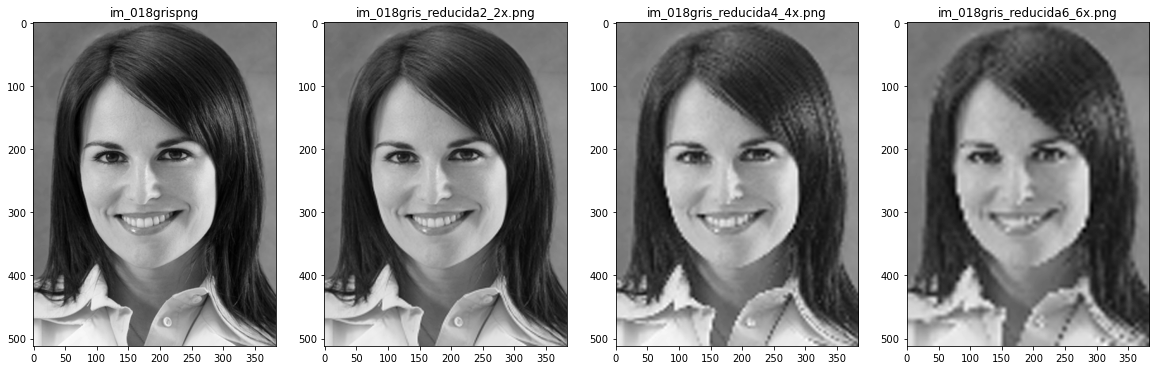

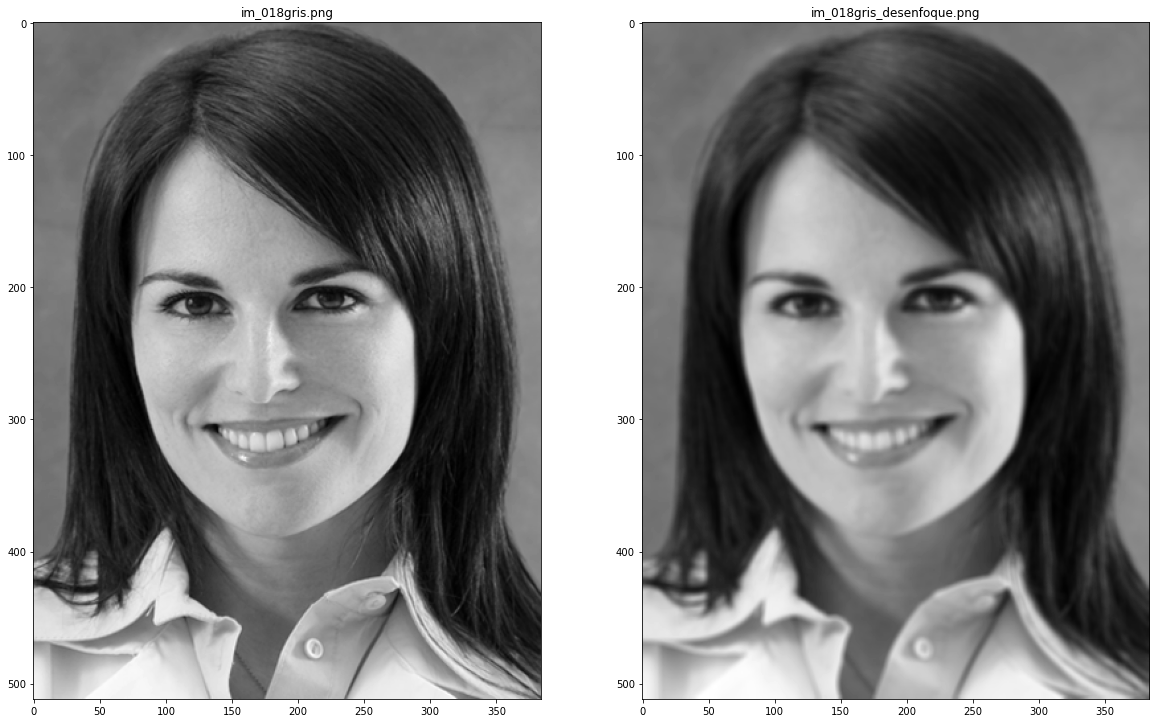

In [22]:
procesar_imagenes(18,19,'general100','general100mod128',
                  'gris','color',
                  'gris_reducida2_2x','color_reducida2_2x',
                  'gris_reducida4_4x','color_reducida4_4x',
                  'gris_reducida6_6x','color_reducida6_6x',
                  'gris_desenfoque','color_desenfoque',
                  'gris_desenfoque2_2x','color_desenfoque2_2x',
                  'gris_desenfoque4_4x','color_desenfoque4_4x',
                  'gris_desenfoque6_6x','color_desenfoque6_6x')

mostrar_imagen_4f(18,19,'general100mod128','gris',
                  'general100mod128','gris_reducida2_2x',
                  'general100mod128','gris_reducida4_4x',
                  'general100mod128','gris_reducida6_6x')

mostrar_imagen_2f(18,19,'general100mod128','gris',
                  'general100mod128','gris_desenfoque')


# Prueba aplicar el automata a una imagen

In [14]:
start = timeit.default_timer()
aplicar_automata6var(18,19,'general100mod128','gris',
                     'general100mod128','gris_mapa',
                     'general100mod128secuencia','gris_mapa',5)
end = timeit.default_timer()
print(end-start)

52.76864469999998


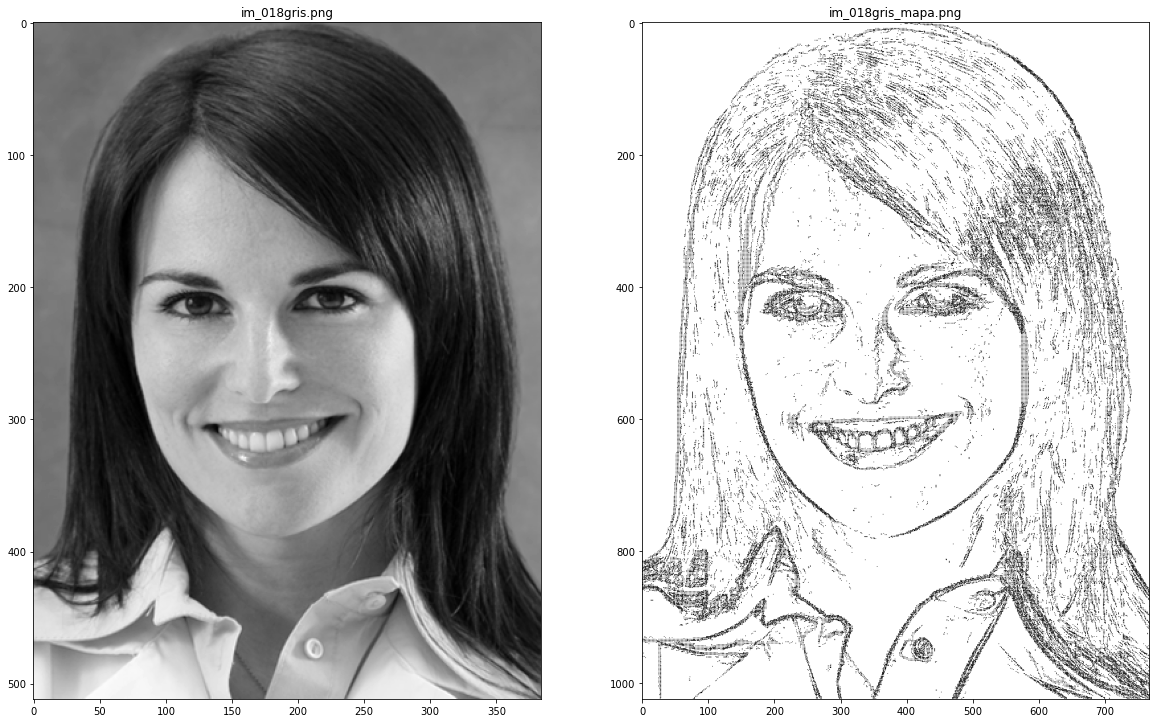

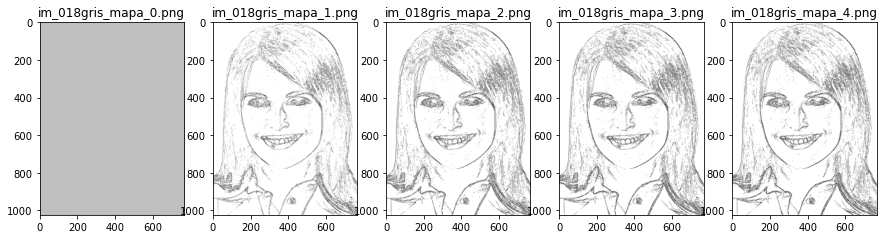

In [15]:
mostrar_imagen_2f(18,19,'general100mod128','gris',
                  'general100mod128','gris_mapa')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapa',5)

In [16]:
start = timeit.default_timer()
aplicar_automata6var(18,19,'general100mod128','gris_reducida2_2x',
                     'general100mod128','gris_mapa_reducida2_2x',
                     'general100mod128secuencia','gris_mapa_reducida2_2x',5)
end = timeit.default_timer()
print(end-start)

52.90088160000005


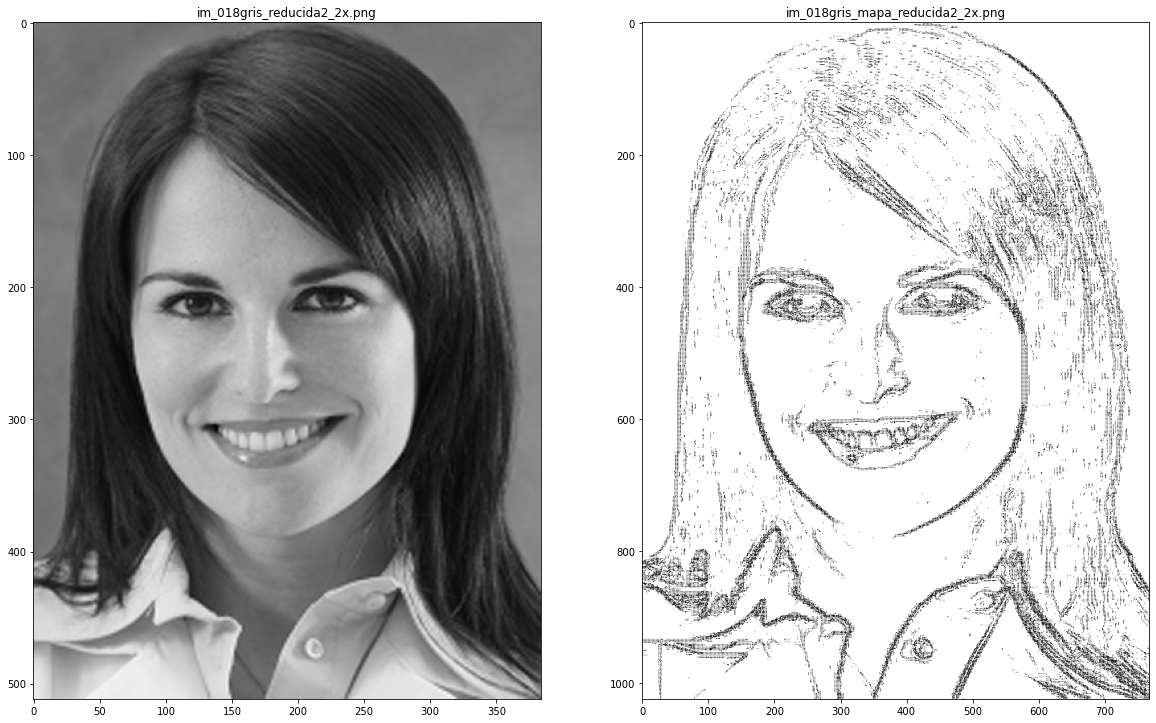

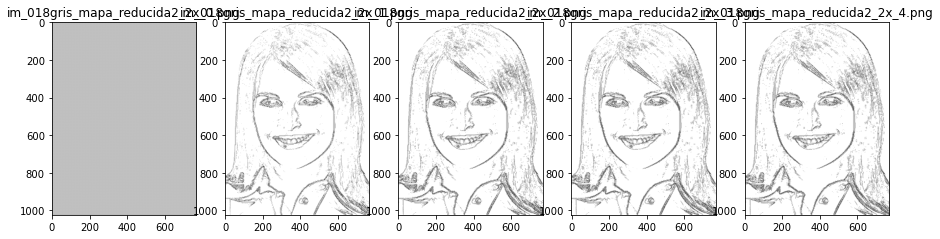

In [17]:
mostrar_imagen_2f(18,19,'general100mod128','gris_reducida2_2x',
                  'general100mod128','gris_mapa_reducida2_2x')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapa_reducida2_2x',5)

In [18]:
start = timeit.default_timer()
aplicar_automata6var(18,19,'general100mod128','gris_reducida4_4x',
                     'general100mod128','gris_mapa_reducida4_4x',
                     'general100mod128secuencia','gris_mapa_reducida4_4x',5)
end = timeit.default_timer()
print(end-start)

52.18973089999997


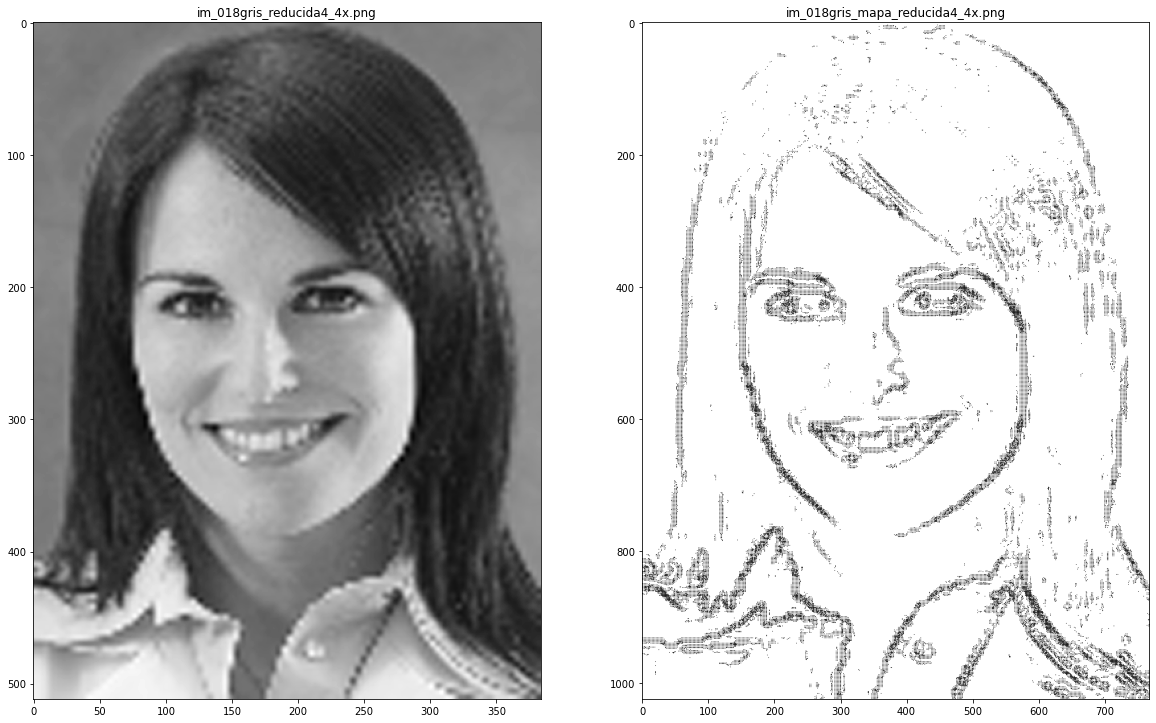

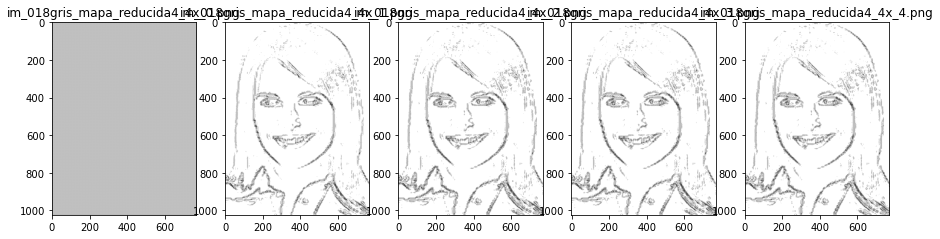

In [19]:
mostrar_imagen_2f(18,19,'general100mod128','gris_reducida4_4x',
                  'general100mod128','gris_mapa_reducida4_4x')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapa_reducida4_4x',5)

In [20]:
start = timeit.default_timer()
aplicar_automata6var(18,19,'general100mod128','gris_reducida6_6x',
                     'general100mod128','gris_mapa_reducida6_6x',
                     'general100mod128secuencia','gris_mapa_reducida6_6x',5)
end = timeit.default_timer()
print(end-start)

105.73779159999992


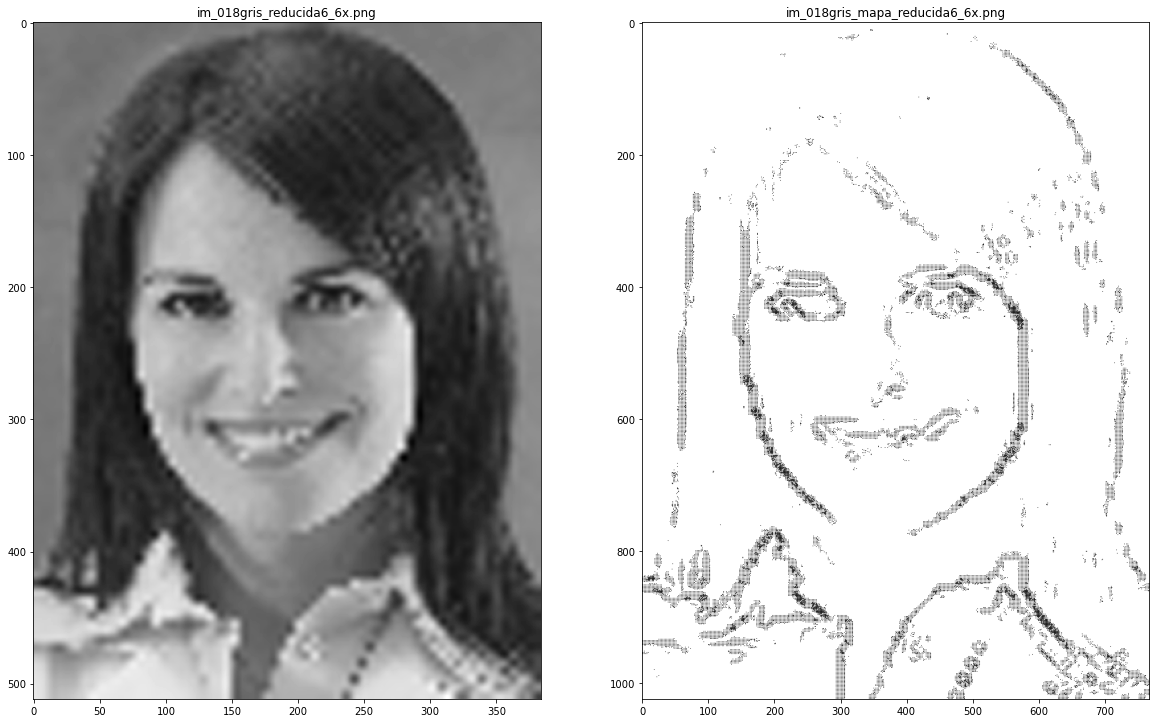

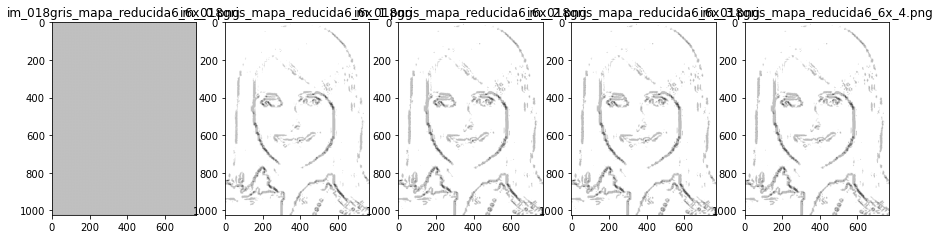

In [21]:
mostrar_imagen_2f(18,19,'general100mod128','gris_reducida6_6x',
                  'general100mod128','gris_mapa_reducida6_6x')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapa_reducida6_6x',5)

# Prueba aplicar el automata INVERSO a una imagen

In [22]:
aplicar_automata6var_inverso(18,19,'general100mod128','gris',
                             'general100mod128','gris_mapaINV',
                             'general100mod128secuencia','gris_mapaINV',5)

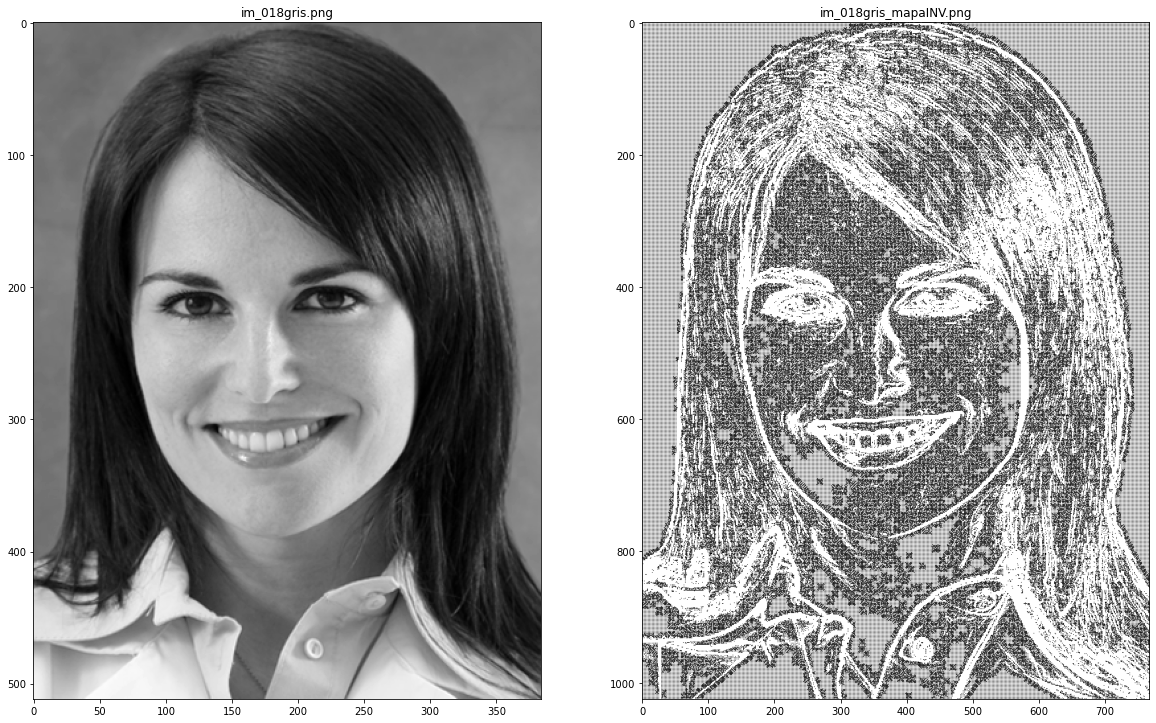

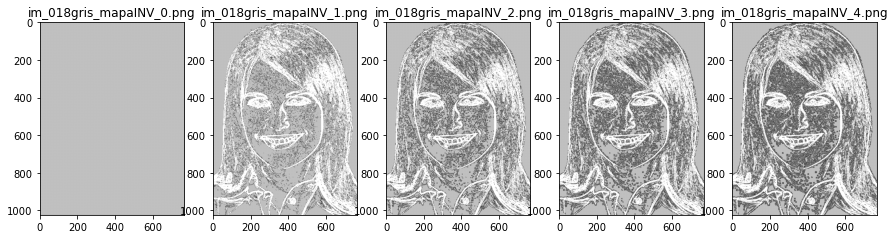

In [23]:
mostrar_imagen_2f(18,19,'general100mod128','gris',
                  'general100mod128','gris_mapaINV')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapaINV',5)

# Prueba Combinar imágenes de los dos autómatas

In [24]:
combinar_automata6var(18,19,'general100mod128','gris_mapa',
                      'general100mod128','gris_mapaINV',
                      'general100mod128','gris_mapaCOMB')

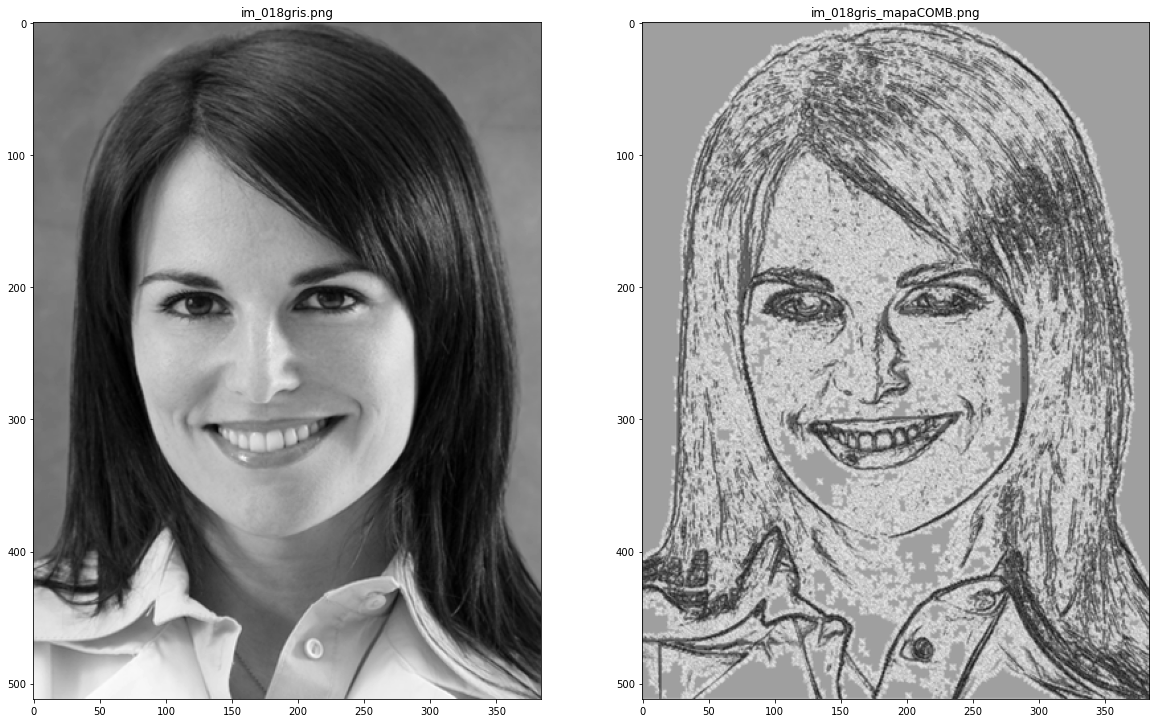

In [25]:
mostrar_imagen_2f(18,19,'general100mod128','gris',
                  'general100mod128','gris_mapaCOMB')

# Prueba segmentacion parches para una sola imagen

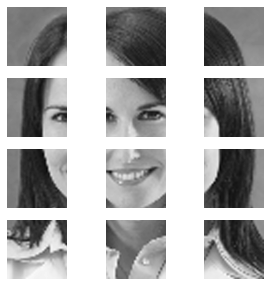

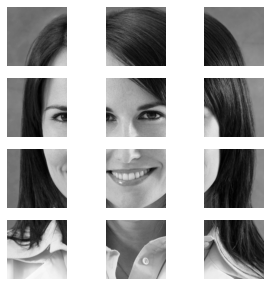

In [26]:

zzdata_img_reducida=construirConjuntoParches(18,19,'general100mod128',['gris_reducida4_4x'])
zzdata_img=construirConjuntoParches(18,19,'general100mod128',['gris'])

zzimg_reducida = cv2.imread('general100mod128'+'/im_018gris_reducida4_4x.png')
zzimg_reducida = cv2.cvtColor(zzimg_reducida, cv2.COLOR_BGR2GRAY)
nseg_horiz=int(zzimg_reducida.shape[1]/128)
nseg_vert=int(zzimg_reducida.shape[0]/128)

k=0
tablag=plt.figure(figsize=(5, 5))
for y in range(0,nseg_vert):
    for x in range(0,nseg_horiz):
        c1=tablag.add_subplot(nseg_vert,nseg_horiz,k+1)
        plt.axis('off')
        plt.imshow(zzdata_img_reducida[k],cmap='gray',vmin=0, vmax=255)        
        k=k+1

k=0
tablag=plt.figure(figsize=(5, 5))
for y in range(0,nseg_vert):
    for x in range(0,nseg_horiz):
        c1=tablag.add_subplot(nseg_vert,nseg_horiz,k+1)
        plt.axis('off')
        plt.imshow(zzdata_img[k],cmap='gray',vmin=0, vmax=255)        
        k=k+1

# Prueba de aumento y recorte del tamaño de la imagen reflejando el contenido del borde

(512, 384)
(640, 512)


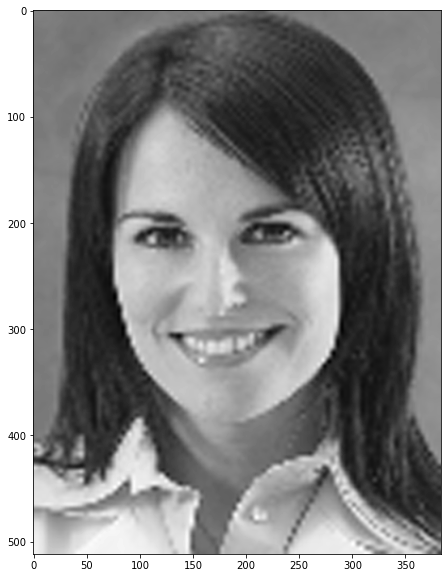

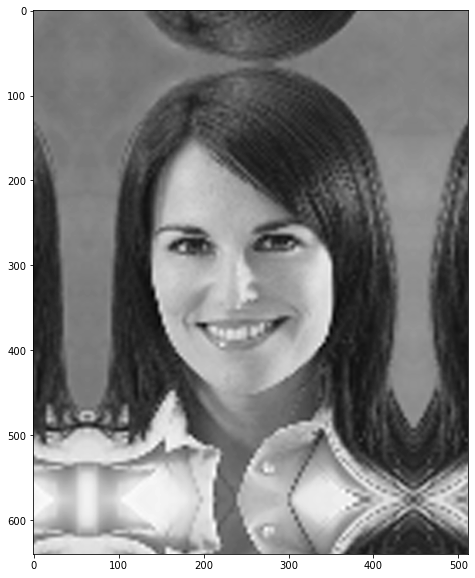

In [27]:
ximg = cv2.imread('general100mod128/im_018gris_reducida4_4x.png')
ximg=cv2.cvtColor(ximg, cv2.COLOR_BGR2GRAY)
print(ximg.shape)
tablag=plt.figure(figsize=(10, 10))
c1=tablag.add_subplot(1,1,1)
plt.imshow(ximg,cmap='gray',vmin=0, vmax=255)

tablag=plt.figure(figsize=(10, 10))
xximg=ampliarBordesImagen(ximg,64)
print(xximg.shape)
c1=tablag.add_subplot(1,1,1)
plt.imshow(xximg,cmap='gray',vmin=0, vmax=255)

(512, 384)


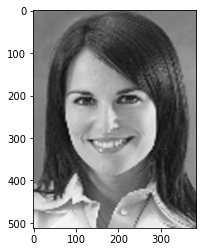

In [28]:
zzimg=recortarBordesImagen(xximg,64)
print(zzimg.shape)
plt.imshow(zzimg,cmap='gray',vmin=0, vmax=255)

# Prueba de aplicar automata, ver proceso a nivel pixel

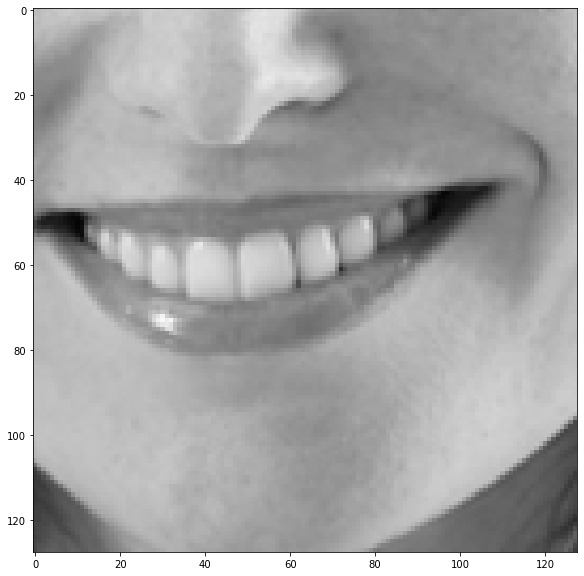

In [29]:
zzdata_img=construirConjuntoParches(18,19,'general100mod128',['gris'])
zzimg = cv2.imread('general100mod128'+'/im_018gris.png')
zzimg = cv2.cvtColor(zzimg, cv2.COLOR_BGR2GRAY)
nseg_horiz=int(zzimg.shape[1]/128)
nseg_vert=int(zzimg.shape[0]/128)
k=0
pos_parche=7
for y in range(0,nseg_vert):
    for x in range(0,nseg_horiz):
        if(k==pos_parche):
            plt.imsave('general100mod128'+'/'+getNombreArchivo(18)+'gris'+'_parche_'+str(k)+'.png',zzdata_img[k],cmap='gray')
        k=k+1

tablag=plt.figure(figsize=(10, 10))
c1=tablag.add_subplot(1,1,1)
plt.imshow(zzdata_img[pos_parche],cmap='gray',vmin=0, vmax=255)

In [30]:
start = timeit.default_timer()
aplicar_automata6var(18,19,'general100mod128','gris_parche_7',
                     'general100mod128','gris_mapa_parche_7',
                     'general100mod128secuencia','gris_mapa_parche_7',5)
end = timeit.default_timer()
print(end-start)

9.07689490000007


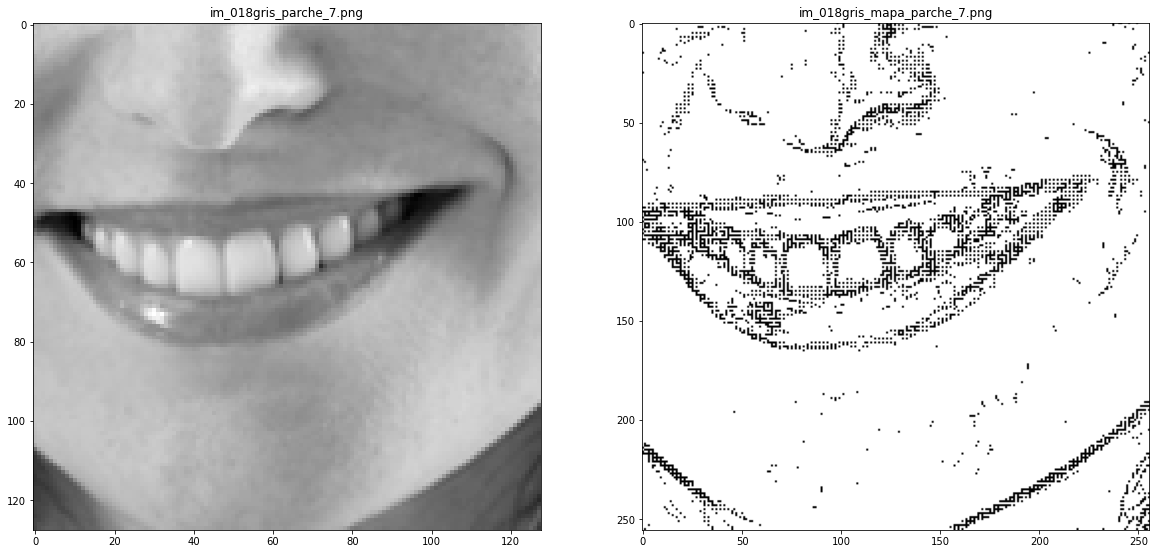

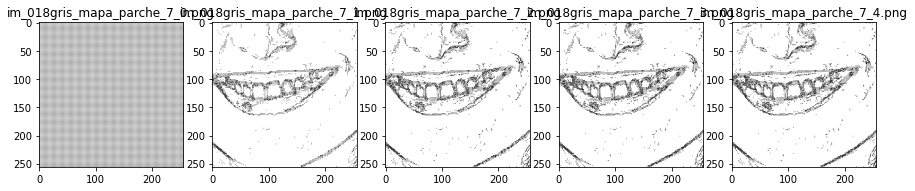

In [31]:
mostrar_imagen_2f(18,19,'general100mod128','gris_parche_7',
                  'general100mod128','gris_mapa_parche_7')
mostrar_imagen_secuencia_ac(18,19,'general100mod128secuencia','gris_mapa_parche_7',5)

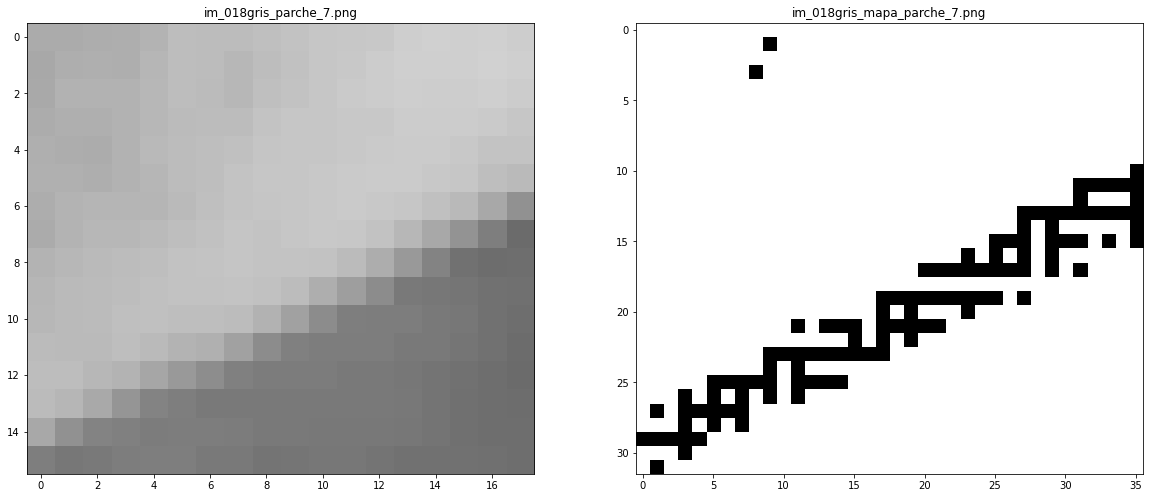

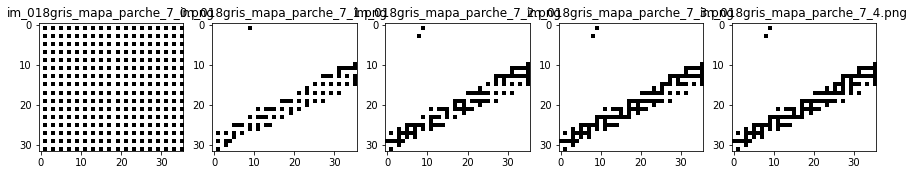

In [32]:
def mostrar_imagen_2f_zoom(xposini,xposfin,xcarpeta1,xnom_img1,xcarpeta2,xnom_img2):
    despla1x=80
    despla1y=80+32
    despla2x=30
    despla2y=0
    for i in range(xposini,xposfin):
        tablag=plt.figure(figsize=(20, 20))
        #axis_font = {'size':'18'}
        
        ximg1=cv2.imread(xcarpeta1+'/'+getNombreArchivo(i)+xnom_img1+'.png')
        ximg1=cv2.cvtColor(ximg1, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,2,1)
        plt.title(getNombreArchivo(i)+xnom_img1+'.png')
        #plt.imshow(ximg1,cmap='gray',vmin=0, vmax=255)
        ximg1_zoom=np.copy(ximg1[0+despla1y:ximg1.shape[0]-despla2y,0+despla1x:ximg1.shape[1]-despla2x])
        plt.imshow(ximg1_zoom,cmap='gray',vmin=0, vmax=255)
        
        ximg2=cv2.imread(xcarpeta2+'/'+getNombreArchivo(i)+xnom_img2+'.png')
        ximg2=cv2.cvtColor(ximg2, cv2.COLOR_BGR2GRAY)
        c1=tablag.add_subplot(1,2,2)
        plt.title(getNombreArchivo(i)+xnom_img2+'.png')
        #plt.imshow(ximg2,cmap='gray',vmin=0, vmax=255)
        ximg2_zoom=np.copy(ximg2[0+(despla1y*2):ximg2.shape[0]-(despla2y*2),0+(despla1x*2):ximg2.shape[1]-(despla2x*2)])
        plt.imshow(ximg2_zoom,cmap='gray',vmin=0, vmax=255)

def mostrar_imagen_secuencia_ac_zoom(xposini,xposfin,xcarpeta_secuenciaimg,xnom_secimg,maxsec):
    despla1x=80
    despla1y=80+32
    despla2x=30
    despla2y=0
    for i in range(xposini,xposfin):
        tablagsec=plt.figure(figsize=(15, 15))
        for ra in range(0,maxsec):
            xmapa=cv2.imread(xcarpeta_secuenciaimg+'/'+getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png')
            xmapa=cv2.cvtColor(xmapa, cv2.COLOR_BGR2GRAY)
            c1=tablagsec.add_subplot(1,maxsec,ra+1)
            plt.title(getNombreArchivo(i)+xnom_secimg+'_'+str(ra)+'.png')
            xmapa_zoom=np.copy(xmapa[0+(despla1y*2):xmapa.shape[0]-(despla2y*2),0+(despla1x*2):xmapa.shape[1]-(despla2x*2)])
            #plt.imshow(xmapa,cmap='gray',vmin=0, vmax=255)
            plt.imshow(xmapa_zoom,cmap='gray',vmin=0, vmax=255)
#-----------------------------------------------------------------------------------------------------------
mostrar_imagen_2f_zoom(18,19,'general100mod128','gris_parche_7',
                  'general100mod128','gris_mapa_parche_7')
mostrar_imagen_secuencia_ac_zoom(18,19,'general100mod128secuencia','gris_mapa_parche_7',5)

# Desmontar Google Drive

In [ ]:
drive.flush_and_unmount()